In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy

from astropy.io import fits
from astropy.table import Table
from collections import OrderedDict as odict
import time


import Functions

In [4]:
ii = 1

In [11]:
%timeit data = Functions.ReadData(Path1, 'EB', 1)

423 ms ± 22.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
while os.path.exists(FilePath):
    FilePath = FilePath[:-4] + '_' + '.pkl'

In [7]:
FilePath

'/global/homes/l/lianming/data/ProbabilityCube_Oct 3_14:21_SNIa-SALT2_.pkl'

In [9]:
Path1 = '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day'
Path2 = '/global/homes/l/lianming/data/GSN_IDEAL_zALL_36min'
Path3 = '/global/homes/l/lianming/data/GSN_IDEAL_z02'
PathTest = '/global/homes/l/lianming/data/For_Test'

In [79]:
MinOfMag = []

for ii in [5]:
    
    Data = Functions.ReadData(Path1, 'SNIa-SALT2', ii)
    DataArray = np.array([ np.array(Obj) for Obj in Data  ])
    
    Mask = Data[0]['BAND'] == 'g '
    
    MinOfMag.extend( [ Obj['SIM_MAGOBS'][Mask].min() for Obj in Data ] )

(array([ 5.,  1.,  4., 14., 13., 11., 17., 26., 24., 28., 19., 15.,  8.,
        10.,  5.]),
 array([20.857437, 21.754936, 22.652435, 23.549934, 24.447432, 25.34493 ,
        26.24243 , 27.139929, 28.037428, 28.934927, 29.832426, 30.729925,
        31.627422, 32.52492 , 33.42242 , 34.31992 ], dtype=float32),
 <a list of 15 Patch objects>)

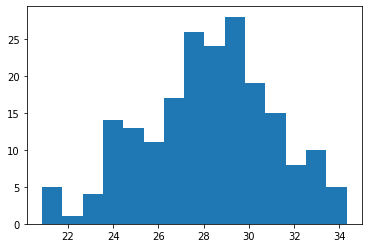

In [80]:
plt.hist(MinOfMag, bins=15)

In [5]:
Data = Functions.ReadData(Path1, 'SNIa-SALT2', 5)
DataArray = np.array([ np.array(Obj) for Obj in Data  ])

In [6]:
Mask = Data[0]['BAND'] == 'g '

In [7]:
DataSelected = [ Obj for Obj in Data if Obj['SIM_MAGOBS'][Mask].max() < 25 ]

In [8]:
MaskObj = np.array([ Obj['SIM_MAGOBS'][Mask].max() for Obj in Data ]) < 25

In [9]:
FigNo = len(DataArray[MaskObj])
FigNo

9

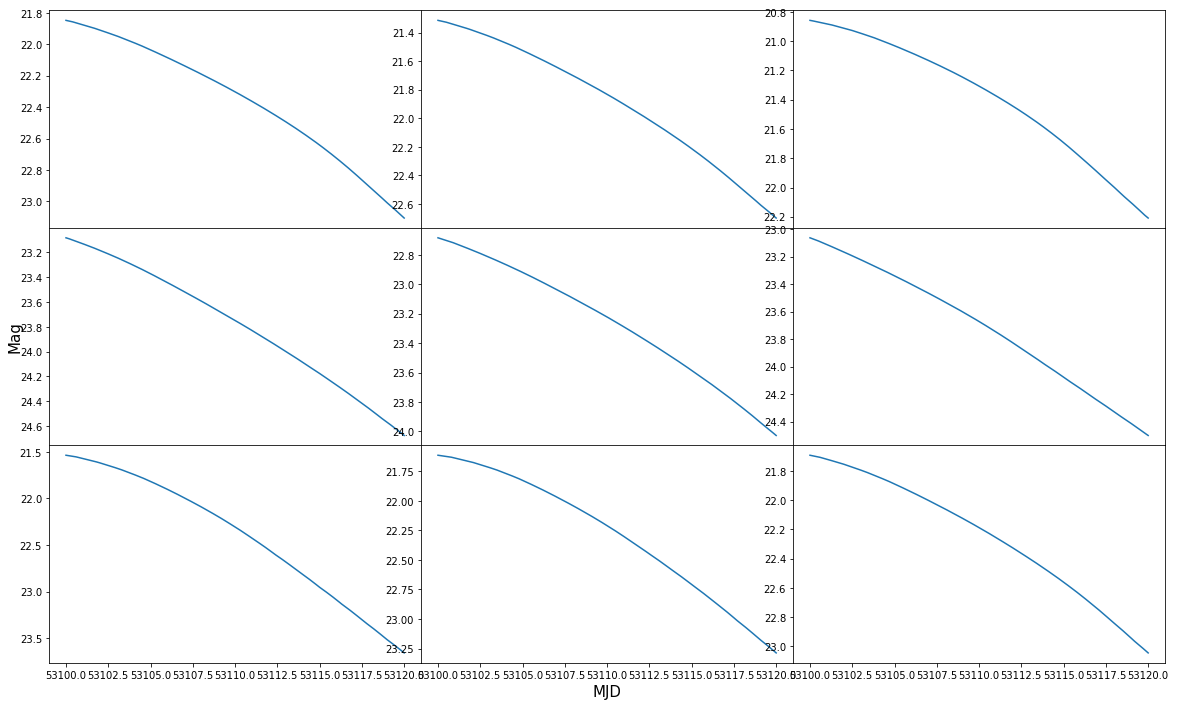

In [35]:
RowNo, ColNo = Functions.RowColNo(FigNo)
        
# fig, axs = plt.subplots( RowNo, ColNo, figsize = (20, 4*RowNo,), sharex=True, sharey=True)
fig, axs = plt.subplots( RowNo, ColNo, figsize = (20, 4*RowNo,), sharex=True)
axflat = axs.flatten()

fig.subplots_adjust(hspace=0, wspace=0)

for ii in range(FigNo):        

    axflat[ii].plot(DataArray[MaskObj][ii]['MJD'][Mask], DataArray[MaskObj][ii]['SIM_MAGOBS'][Mask])


#     axflat[ii].set_ylim(axflat[ii].get_ylim()[::-1])
#         axflat[ii].set_ylim([20, 15])
#         axflat[iiset_xlim([53095, 53120])

#         axflat[ii].text(0.99, 0.99, 'FileNo {}, ObjNo{}'.format(FNo, ONo), ha='right', va='top', transform=axflat[II*len(ObjNo)+JJ].transAxes)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False )

plt.xlabel('MJD', fontsize=15 )
plt.ylabel('Mag', fontsize=15)


for ii in range(FigNo):
    
    axflat[ii].invert_yaxis()

In [42]:
DataArray[MaskObj][0]

array([(53100., b'u ', -9, b'VOID        ', 4096, -9.,  497.7069 , nan, 1., 0., 0., 1264.911, 0., 31.622776, 42.5, 0., 1., 20.757639, 0.),
       (53100., b'g ', -9, b'VOID        ', 4096, -9., 1176.054  , nan, 1., 0., 0., 1264.911, 0., 31.622776, 42.5, 0., 1., 19.823896, 0.),
       (53100., b'r ', -9, b'VOID        ', 4096, -9., 1097.2803 , nan, 1., 0., 0., 1264.911, 0., 31.622776, 42.5, 0., 1., 19.899208, 0.),
       ...,
       (53120., b'i ', -9, b'VOID        ', 4096, -9.,  452.9872 , nan, 1., 0., 0., 1264.911, 0., 31.622776, 42.5, 0., 1., 20.859823, 0.),
       (53120., b'z ', -9, b'VOID        ', 4096, -9.,  298.01874, nan, 1., 0., 0., 1264.911, 0., 31.622776, 42.5, 0., 1., 21.314342, 0.),
       (53120., b'Y ', -9, b'VOID        ', 4096, -9.,  286.86786, nan, 1., 0., 0., 1264.911, 0., 31.622776, 42.5, 0., 1., 21.355717, 0.)],
      dtype=[('MJD', '<f8'), ('BAND', 'S2'), ('CCDNUM', '<i2'), ('FIELD', 'S12'), ('PHOTFLAG', '<i4'), ('PHOTPROB', '<f4'), ('FLUXCAL', '<f4'), ('FLUXCAL

Counting AGN:                     ||||||||||||||||||||	 time spent: 11.158 s
Counting CART:                    ||||||||||||||||||||	 time spent: 10.512 s
Counting EB:                      ||||||||||||||||||||	 time spent:  9.962 s
Counting ILOT:                    ||||||||||||||||||||	 time spent:  5.039 s
Counting KN_B19:                  ||||||||||||||||||||	 time spent: 10.490 s
Counting KN_K17:                  ||||||||||||||||||||	 time spent: 10.689 s
Counting MIRA:                    ||||||||||||||||||||	 time spent: 11.076 s
Counting Mdwarf:                  ||||||||||||||||||||	 time spent: 11.133 s
Counting PISN:                    ||||||||||||||||||||	 time spent: 10.985 s
Counting RRL:                     ||||||||||||||||||||	 time spent: 11.173 s
Counting SLSN-I:                  ||||||||||||||||||||	 time spent: 10.974 s
Counting SNII-NMF:                ||||||||||||||||||||	 time spent: 11.096 s
Counting SNII-Templates:          ||||||||||||||||||||	 time spent: 10.806 s

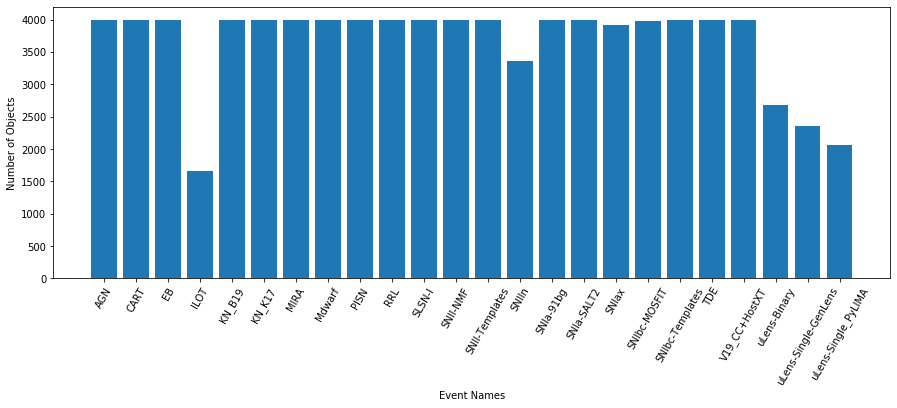

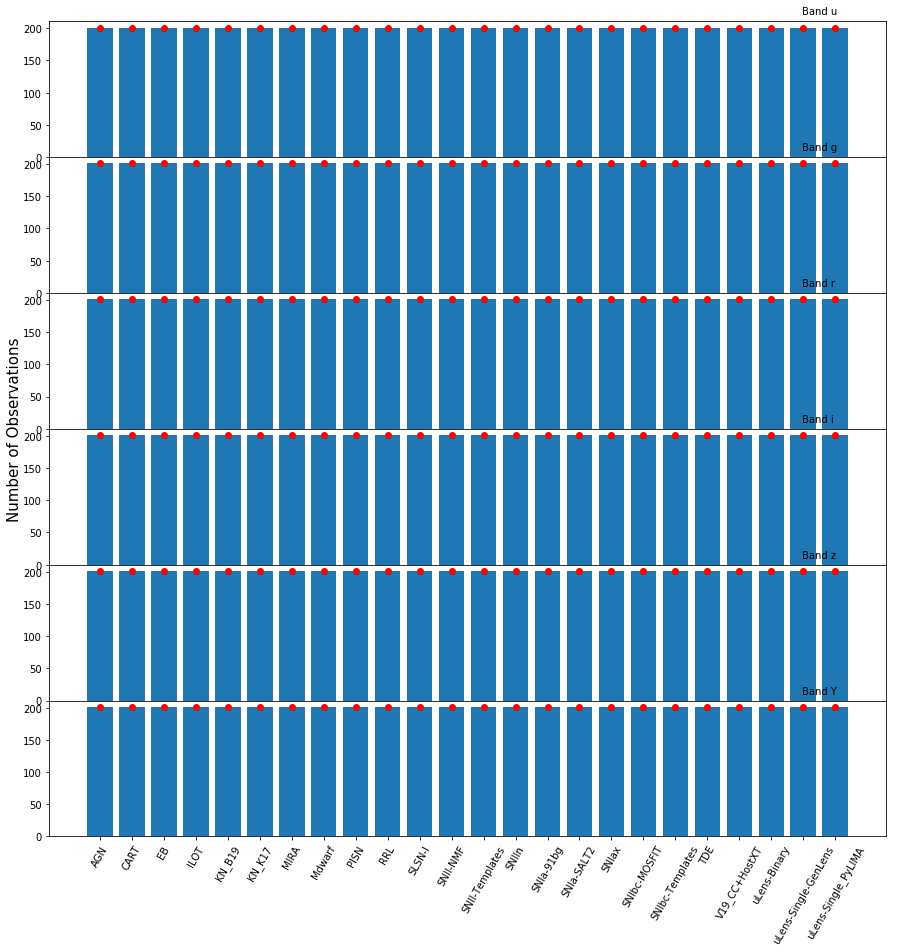

In [23]:
Functions.GetObsNum(Path1)

In [20]:
data = Functions.ReadData(Path3, 'EB', 0)

In [21]:
len(data)

2000

Counting AGN:                     ||||||||||||||||||||	 time spent: 118.223 s
Counting CART:                    ||||||||||||||||||||	 time spent: 110.324 s
Counting EB:                      ||||||||||||||||||||	 time spent: 123.146 s
Counting ILOT:                    ||||||||||||||||||||	 time spent: 120.736 s
Counting KN_B19:                  ||||||||||||||||||||	 time spent: 105.914 s
Counting KN_K17:                  ||||||||||||||||||||	 time spent: 102.050 s
Counting MIRA:                    ||||||||||||||||||||	 time spent: 105.802 s
Counting Mdwarf:                  ||||||||||||||||||||	 time spent: 104.363 s
Counting PISN:                    ||||||||||||||||||||	 time spent: 104.408 s
Counting RRL:                     ||||||||||||||||||||	 time spent: 104.703 s
Counting SLSN-I:                  ||||||||||||||||||||	 time spent: 105.262 s
Counting SNII-NMF:                ||||||||||||||||||||	 time spent: 106.160 s
Counting SNII-Templates:          ||||||||||||||||||||	 time spe

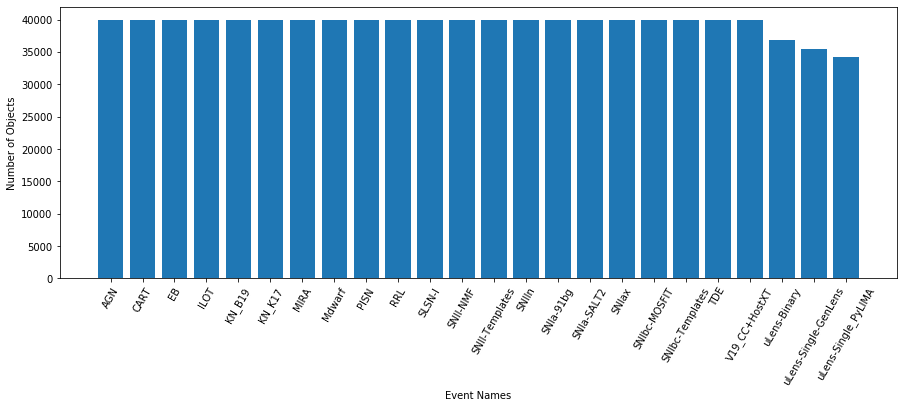

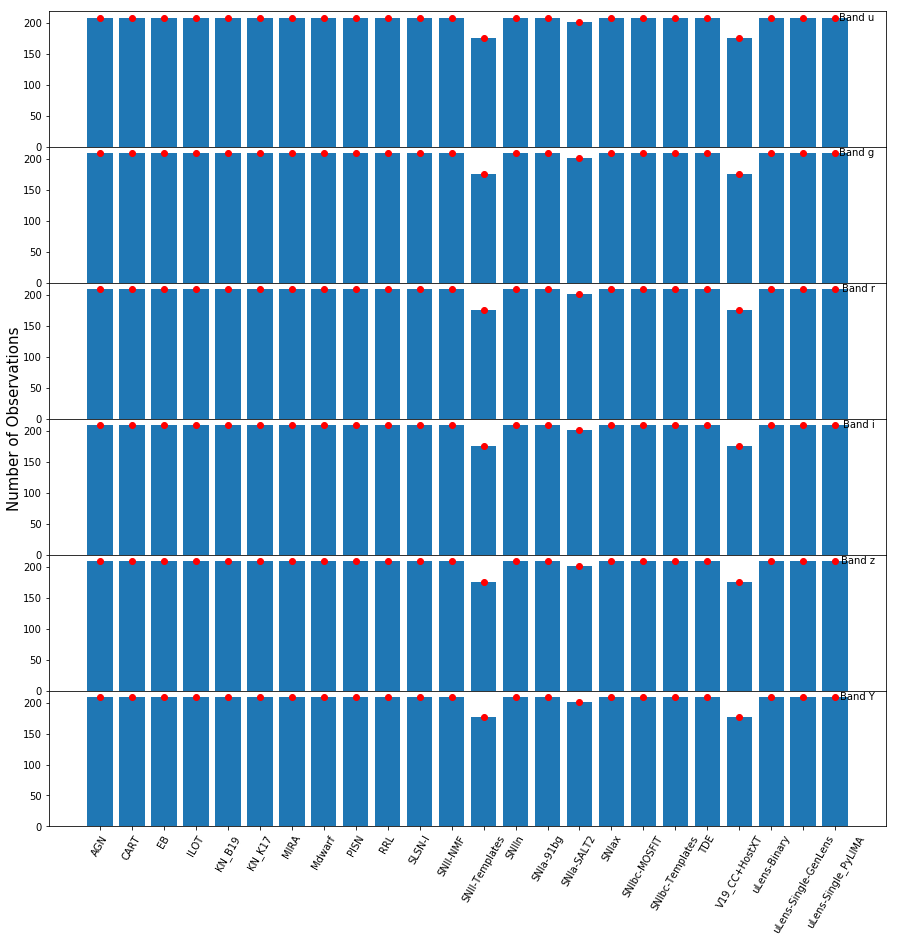

In [36]:
Functions.GetObsNum(Path3)

Counting TDE:                     ||||||||||||||||||||	 time spent: 11.325 s
Counting uLens-Single-GenLens:    ||||||||||||||||||||	 time spent:  7.207 s
Counting uLens-Single_PyLIMA:     ||||||||||||||||||||	 time spent:  6.227 s


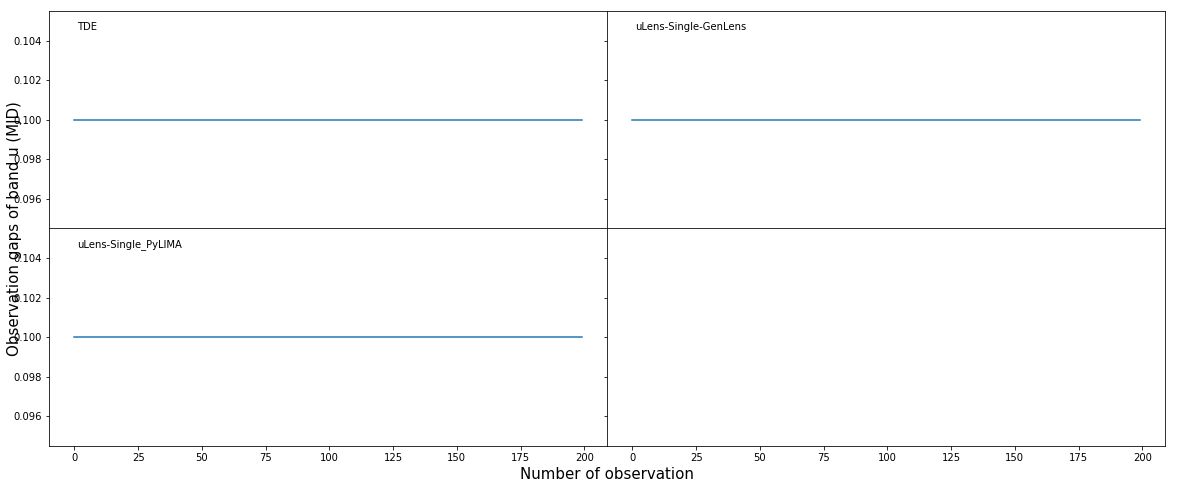

In [10]:
Functions.GetObsGaps1(PathTest, 'u')

In [ ]:
plt.plot(DataBand['MJD'][a:b], DataBand['SIM_MAGOBS'][a:b])

In [21]:
96000000128/1024/1024/1024

89.40696728229523

In [27]:
len(Data)

1206

In [28]:
Functions.GetEventPaths(Path1)

{'AGN': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL88_AGN',
 'CART': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL99_CART',
 'EB': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL16_EB',
 'ILOT': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL99_ILOT',
 'KN_B19': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL64_KN_B19',
 'KN_K17': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL64_KN_K17',
 'MIRA': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL53_MIRA',
 'Mdwarf': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL65_Mdwarf',
 'PISN': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL99_PISN',
 'RRL': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL92_RRL',
 'SLSN-I': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDE

In [8]:
Functions.GetEventPaths(Path3)

{'AGN': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL88_AGN',
 'CART': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL99_CART',
 'EB': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL16_EB',
 'ILOT': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL99_ILOT',
 'KN_B19': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL64_KN_B19',
 'KN_K17': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL64_KN_K17',
 'MIRA': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL53_MIRA',
 'Mdwarf': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL65_Mdwarf',
 'PISN': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL99_PISN',
 'RRL': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL92_RRL',
 'SLSN-I': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL95_SLSN-I',
 'SNII-NMF': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL42_SNII-NMF',
 'SNII-Templates': '/global/homes/l/

In [11]:
Data = Functions.ReadData(Path3, 'SNIa-SALT2', 0)

In [12]:
Data[0]

<Table length=1206>
  MJD    BAND  CCDNUM    FIELD     ...   GAIN  SIM_MAGOBS SIM_FLUXCAL_HOSTERR
float64 bytes2 int16    bytes12    ... float32  float32         float32      
------- ------ ------ ------------ ... ------- ---------- -------------------
53000.0     u      -9 NULL         ...     1.0       99.0                 0.0
53000.0     g      -9 NULL         ...     1.0       99.0                 0.0
53000.0     r      -9 NULL         ...     1.0       99.0                 0.0
53000.0     i      -9 NULL         ...     1.0       99.0                 0.0
53000.0     z      -9 NULL         ...     1.0       99.0                 0.0
53000.0     Y      -9 NULL         ...     1.0       99.0                 0.0
53002.0     u      -9 NULL         ...     1.0       99.0                 0.0
53002.0     g      -9 NULL         ...     1.0       99.0                 0.0
53002.0     r      -9 NULL         ...     1.0       99.0                 0.0
53002.0     i      -9 NULL         ...     1.0       99.0                 0.0
    ...    ...    ...          ... ...     ...        ...                 ...
53398.0     r      -9 NULL         ...     1.0  22.609259                 0.0
53398.0     i      -9 NULL         ...     1.0  22.762573                 0.0
53398.0     z      -9 NULL         ...     1.0   22.18034                 0.0
53398.0     Y      -9 NULL         ...     1.0  21.775417                 0.0
53400.0     u      -9 NULL         ...     1.0  24.323969                 0.0
53400.0     g      -9 NULL         ...     1.0   22.22904                 0.0
53400.0     r      -9 NULL         ...     1.0  22.641743                 0.0
53400.0     i      -9 NULL         ...     1.0  22.792233                 0.0
53400.0     z      -9 NULL         ...     1.0  22.202942                 0.0
53400.0     Y      -9 NULL         ...     1.0  21.793865                 0.0

In [183]:
XX = np.arange(10)
YY1 = [0,0,0,0,0,1,1,1,1,1]
YY2 = [0,0,0,1,1,1,1,0,0,0]

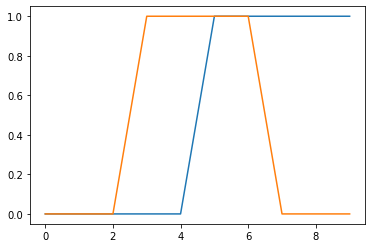

In [184]:
plt.plot(XX, YY1, XX, YY2)

In [14]:
np.fft

<module 'numpy.fft' from '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/numpy/fft/__init__.py'>

In [78]:
EventName = 'EB'

The threshold for the magnitude is 27.5.
The objects plotted are from FileNo=[7, 13, 3, 18, 11], ObjNo=[1974, 199, 1721, 967, 1169]


([7, 13, 3, 18, 11], [1974, 199, 1721, 967, 1169])

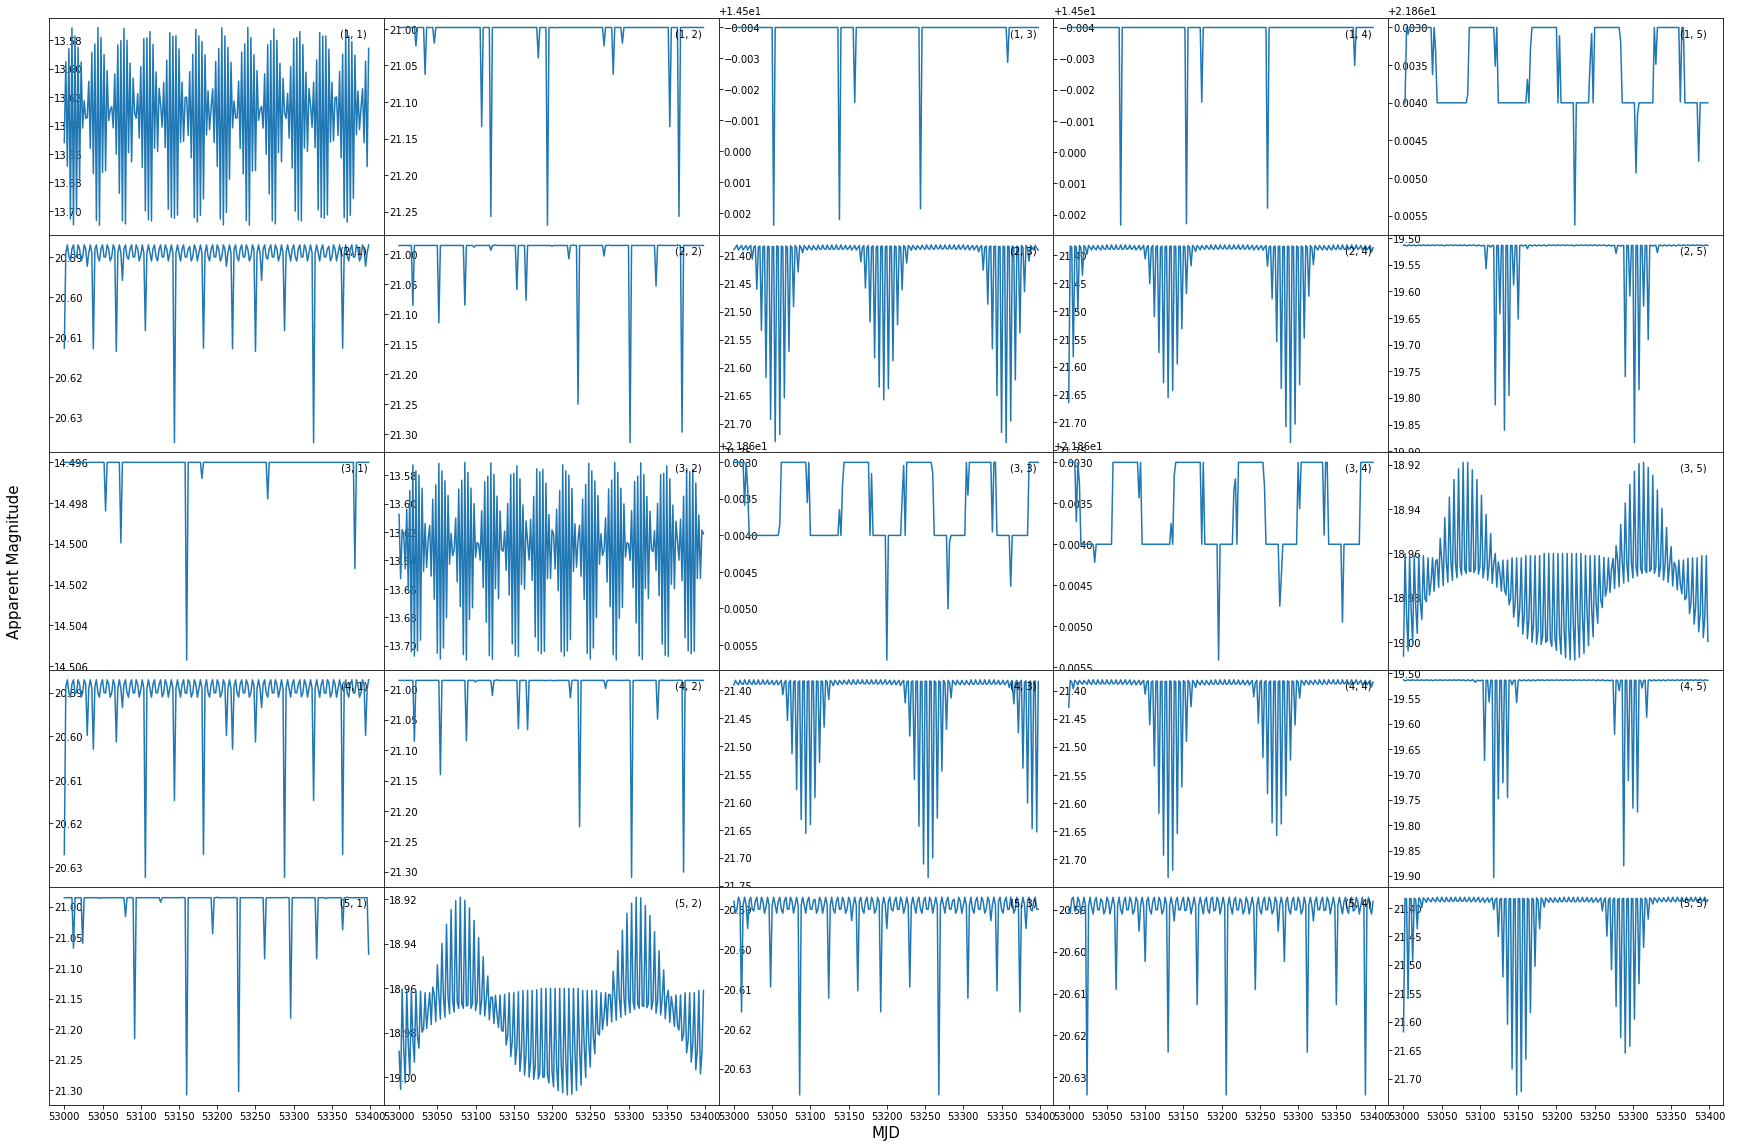

In [79]:
Functions.PlotLightCurve(Path3, 'g', EventName, FileNo = [ 7, 13,  3, 18, 11], ObjNo = [1974,  199, 1721,  967, 1169])

The threshold for the magnitude is 27.5.
The objects plotted are from FileNo=[7, 13, 3, 18, 11], ObjNo=[1974, 199, 1721, 967, 1169]


([7, 13, 3, 18, 11], [1974, 199, 1721, 967, 1169])

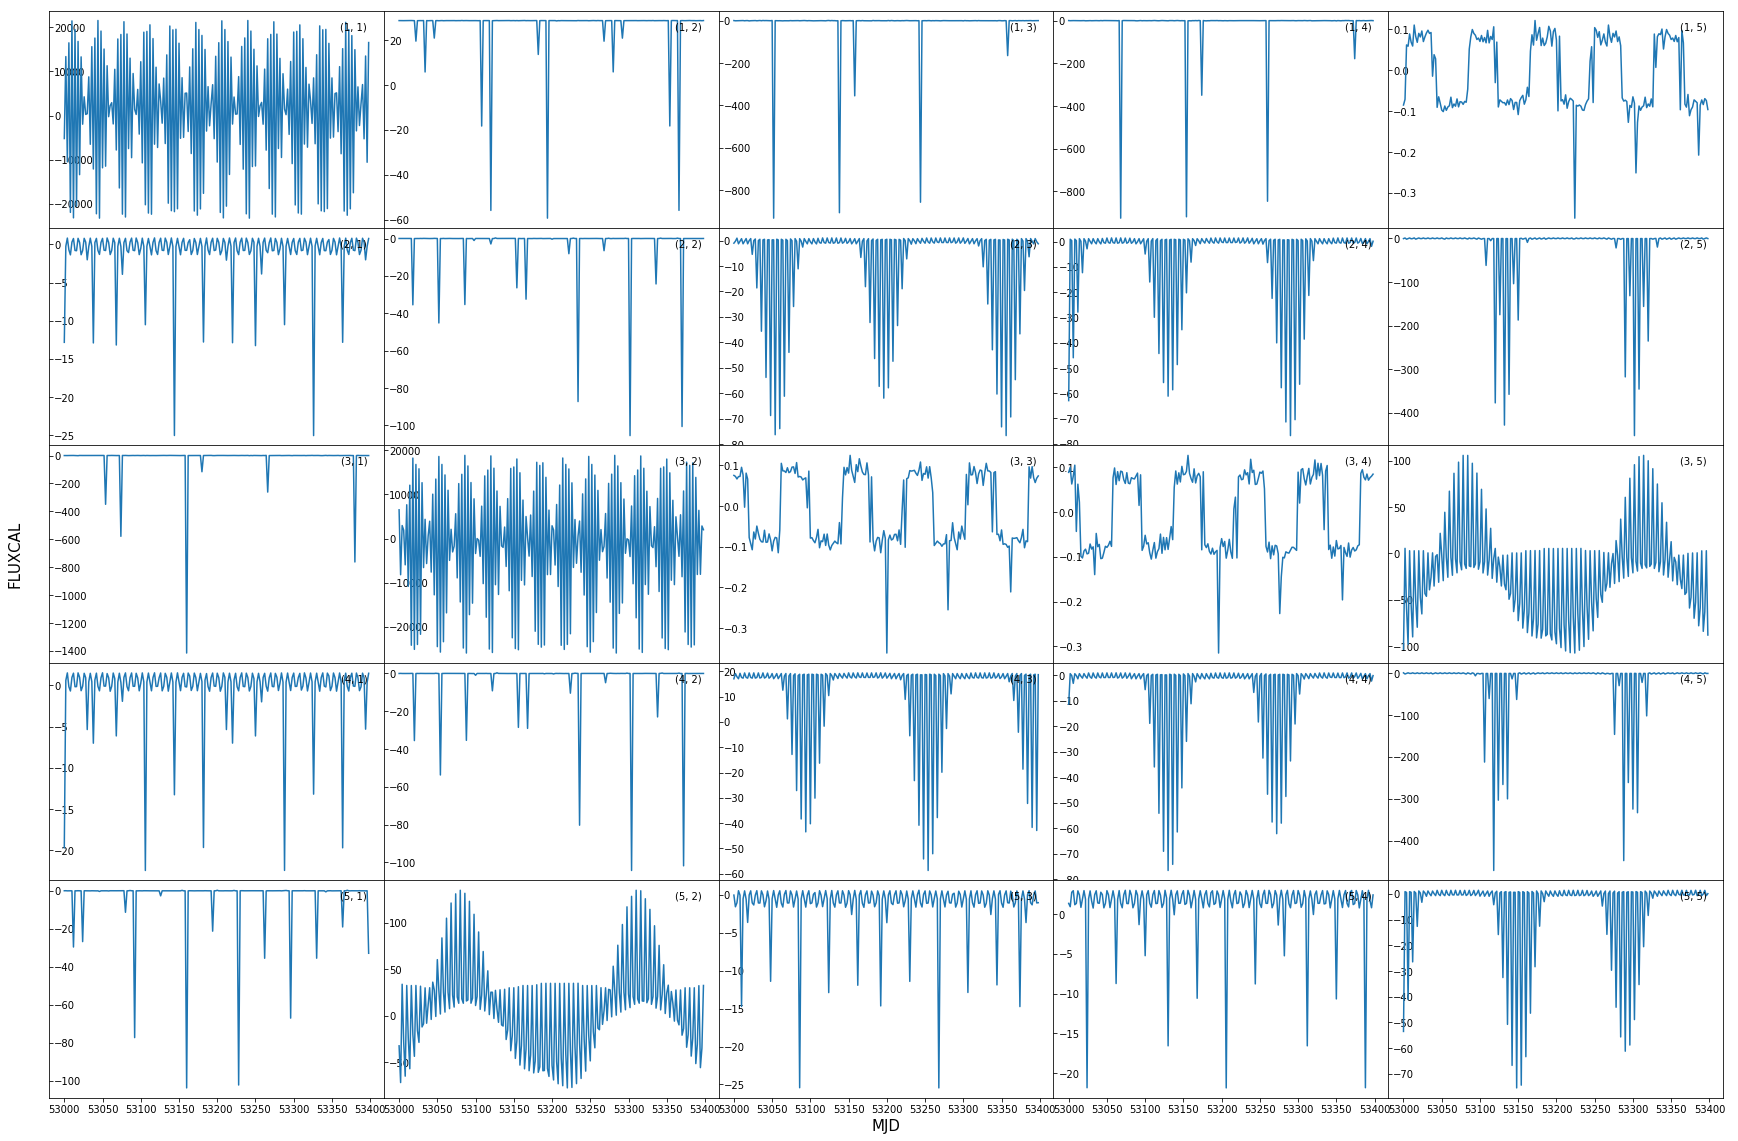

In [80]:
Functions.PlotLightCurve(Path3, 'g', EventName, Prop='FLUXCAL', FileNo = [ 7, 13,  3, 18, 11], ObjNo = [1974,  199, 1721,  967, 1169])

The threshold for the magnitude is 27.5.
The objects plotted are from FileNo=[13, 11, 1, 6, 7], ObjNo=[143, 121, 28, 185, 26]


(array([13, 11,  1,  6,  7]), array([143, 121,  28, 185,  26]))

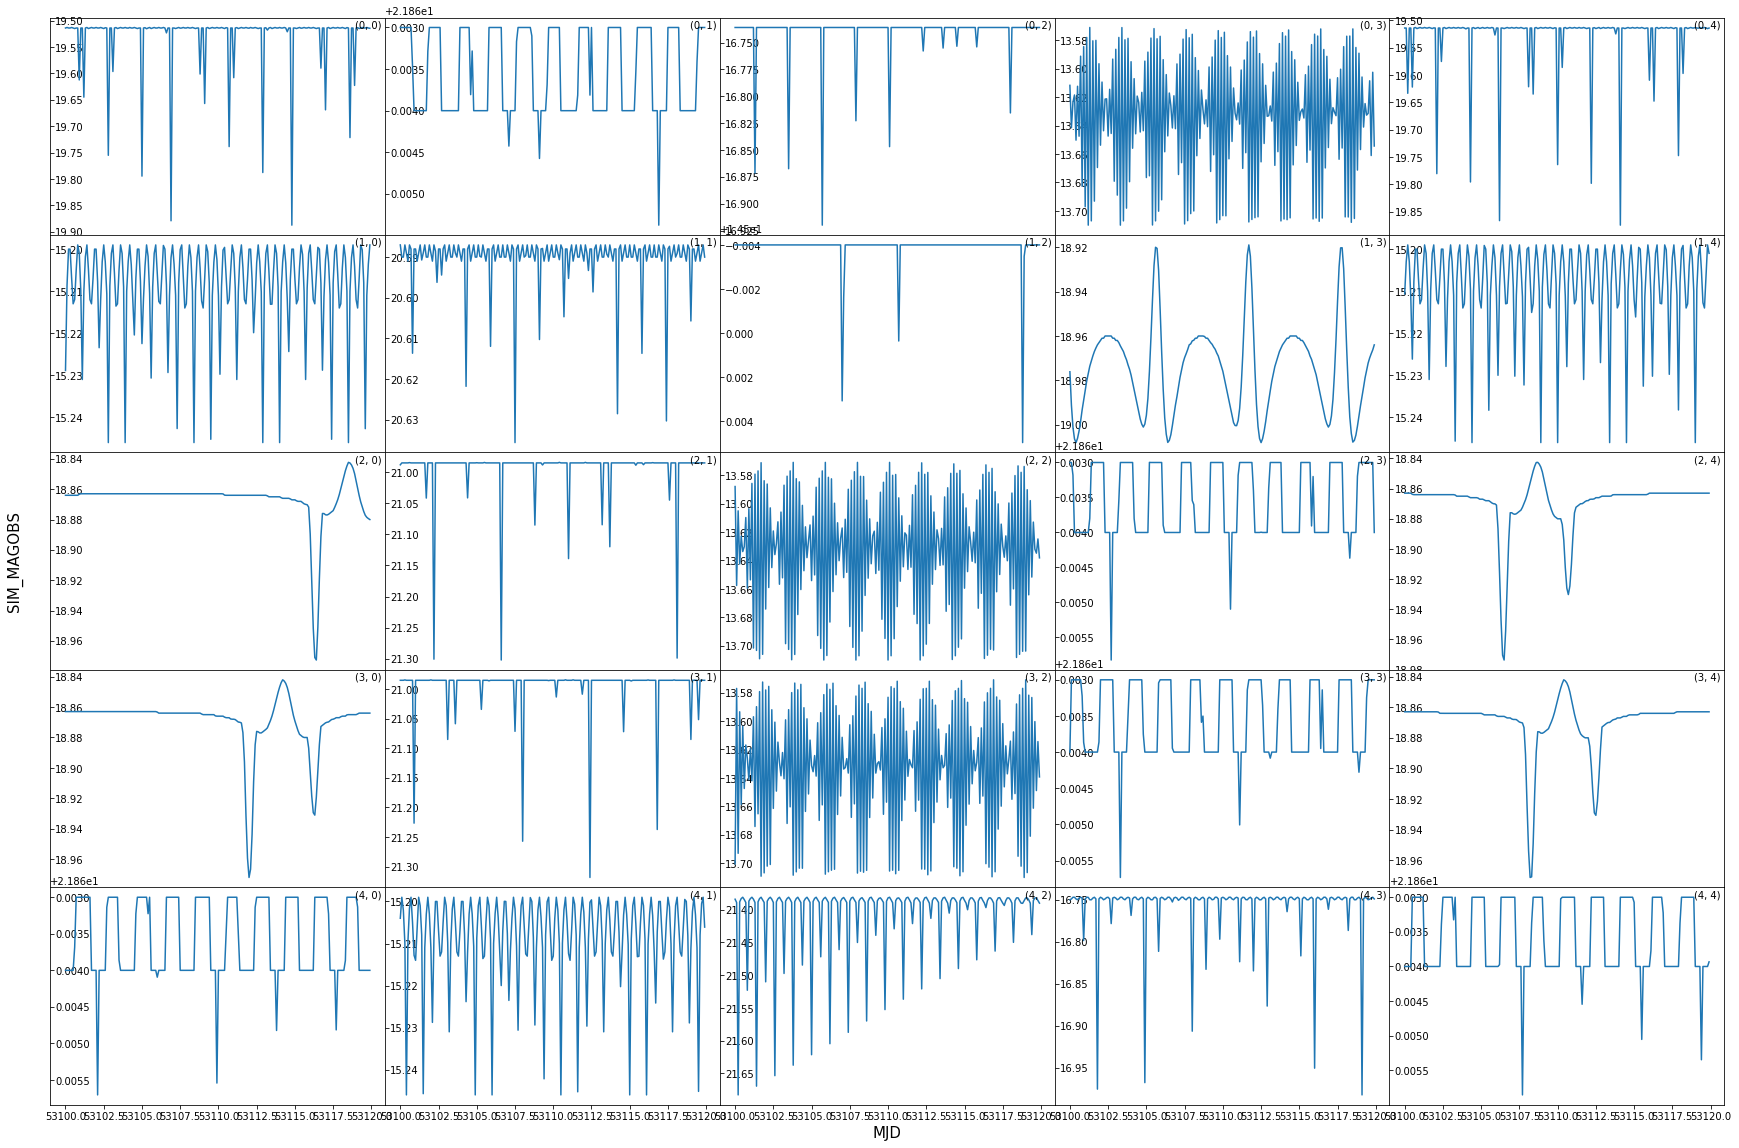

In [24]:
Functions.PlotLightCurve(Path1, 'g', 'EB')

The threshold for the magnitude is 27.5.
The objects plotted are from FileNo=[1, 5, 13], ObjNo=[96, 88, 160]


(array([ 1,  5, 13]), array([ 96,  88, 160]))

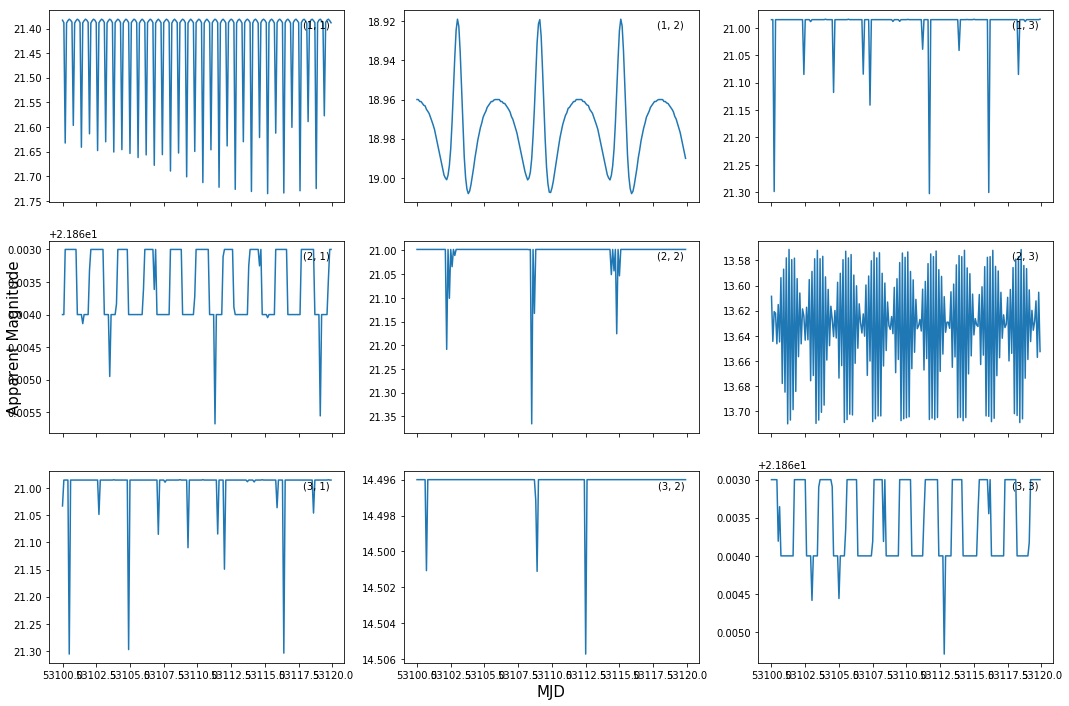

In [119]:
Functions.PlotLightCurve(Path1, 'g', 'EB', Space=True, FigNo=9)

The threshold for the magnitude is 27.5.
The objects plotted are from FileNo=[2, 2, 11], ObjNo=[56, 135, 101]


(array([ 2,  2, 11]), array([ 56, 135, 101]))

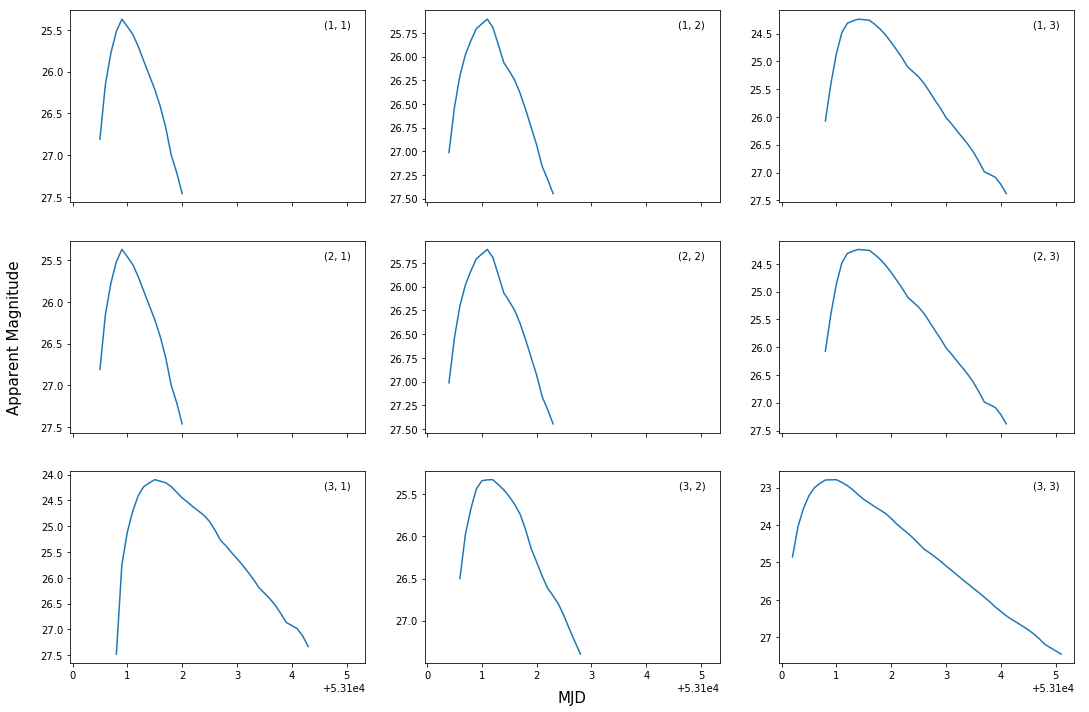

In [126]:
Functions.PlotLightCurve(Path1, 'g', 'KN_B19', Space=True, FigNo=9)

The threshold for the magnitude is 30.
The objects plotted are from FileNo=[18, 14, 2, 5, 7], ObjNo=[115, 1, 103, 156, 82]


([18, 14, 2, 5, 7], [115, 1, 103, 156, 82])

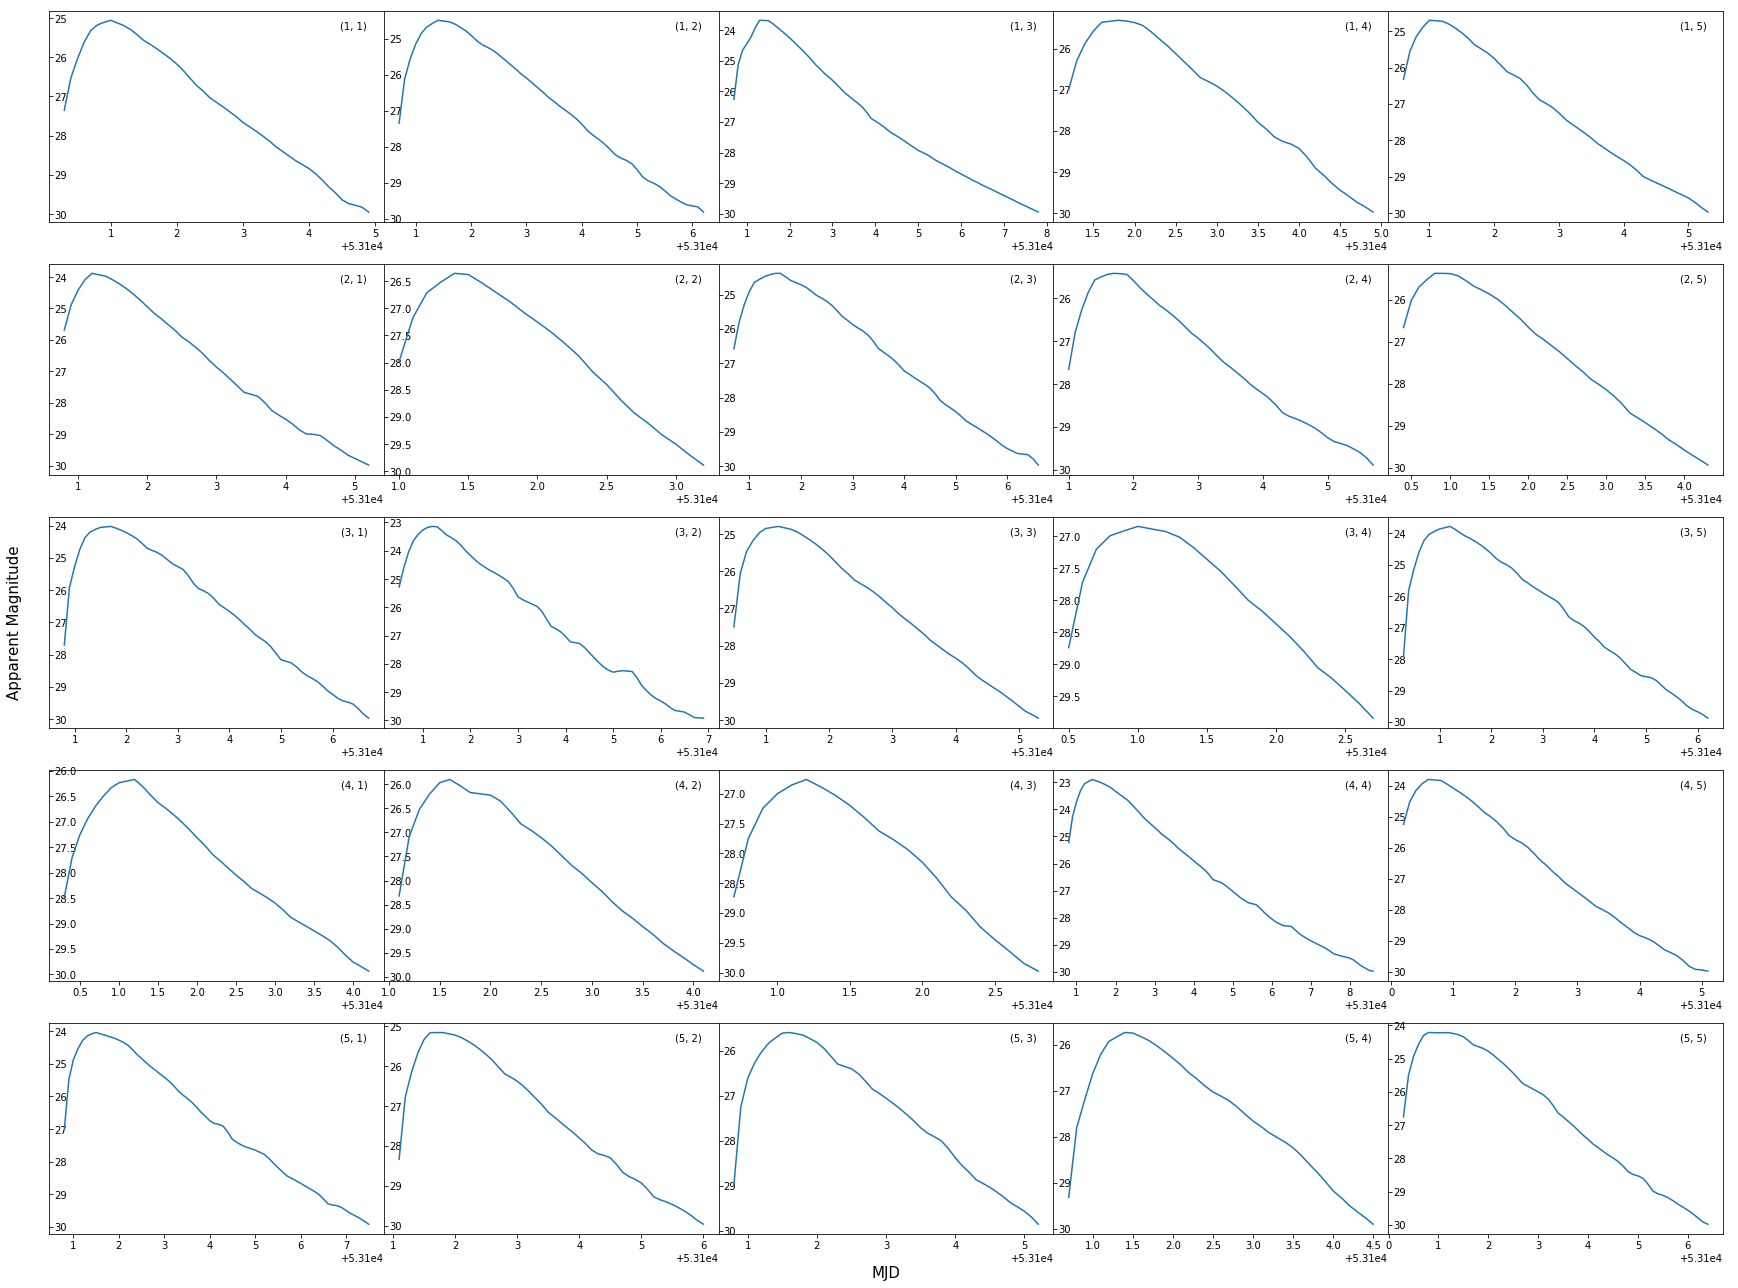

In [128]:
Functions.PlotLightCurve(Path1, 'g', 'KN_B19', FileNo=[18, 14,  2 , 5 , 7], ObjNo = [115,   1, 103, 156,  82], thr=30, sharex=False)

The threshold for the magnitude is 30.
The objects plotted are from FileNo=[18, 14, 2, 5, 7], ObjNo=[115, 1, 103, 156, 82]


([18, 14, 2, 5, 7], [115, 1, 103, 156, 82])

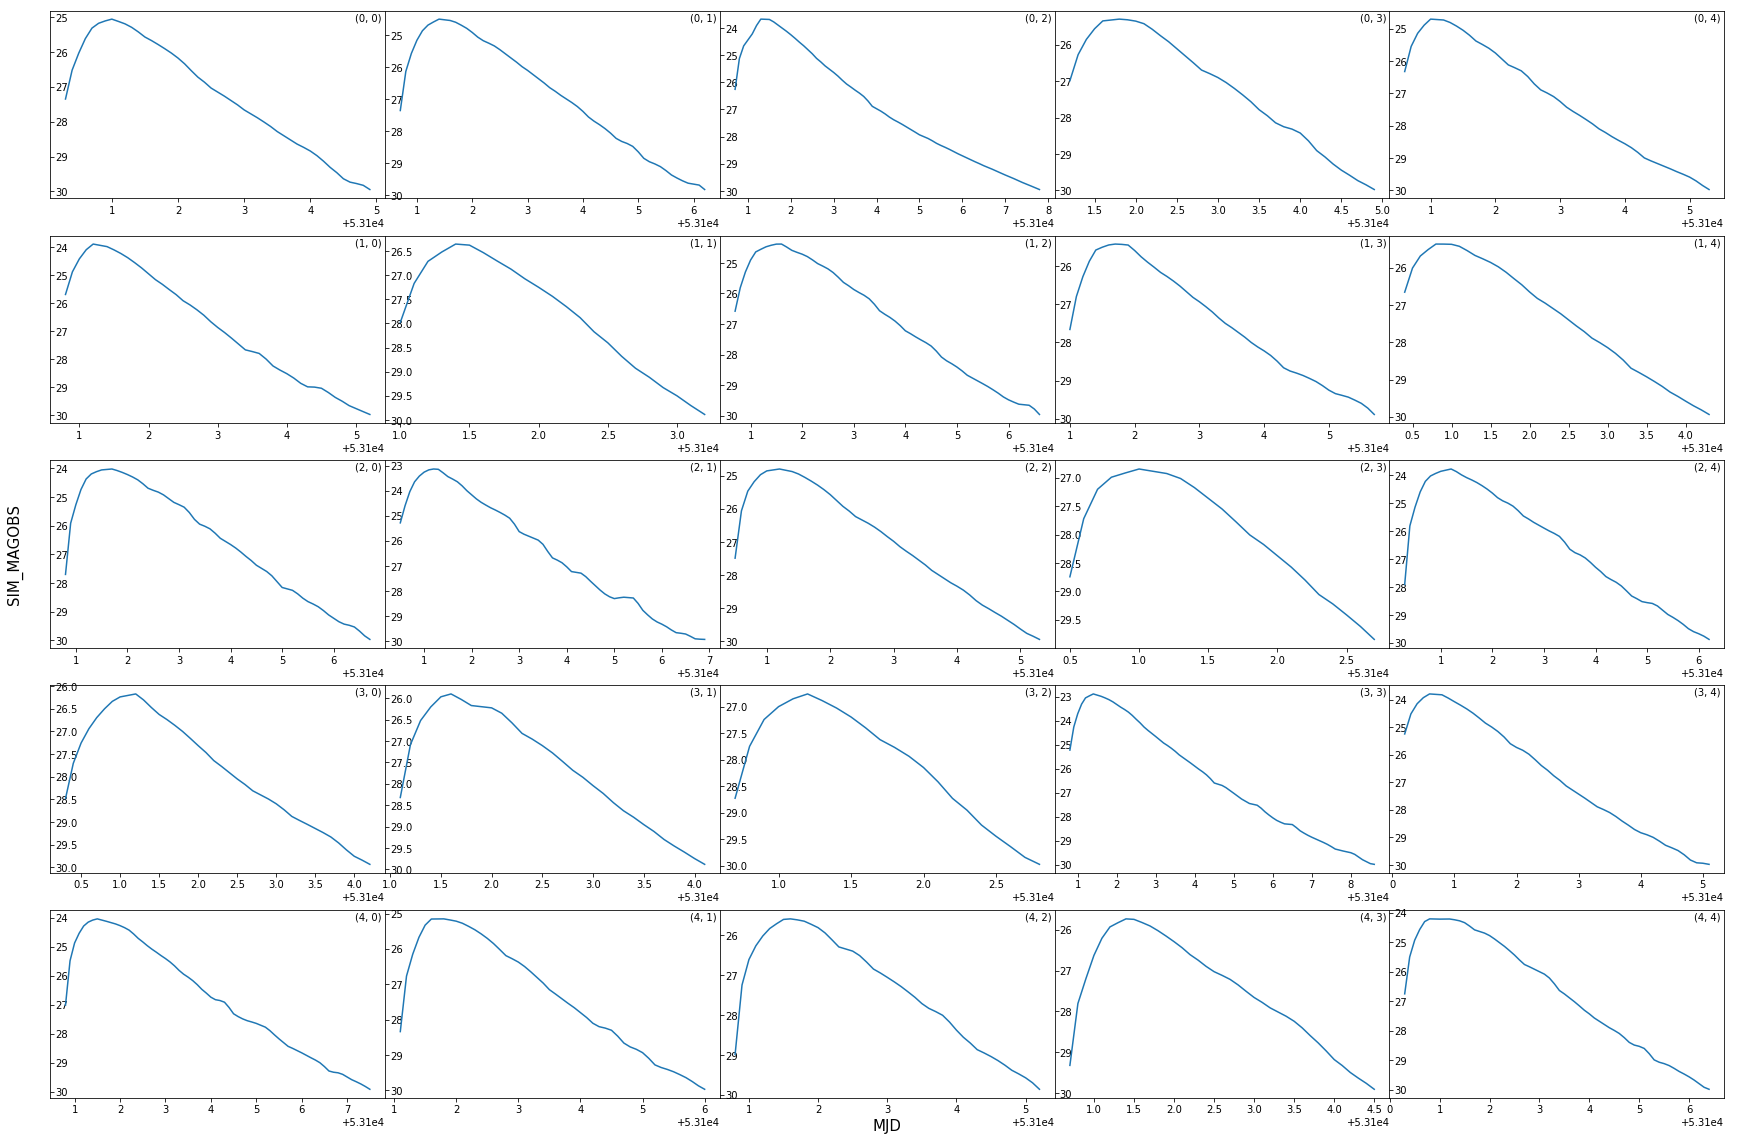

In [21]:
Functions.PlotLightCurve(Path1, 'g', 'KN_B19', FileNo=[18, 14,  2 , 5 , 7], ObjNo = [115,   1, 103, 156,  82], thr=30, sharex=False)

The threshold for the magnitude is 30.
The objects plotted are from FileNo=[18, 14, 2, 5, 7], ObjNo=[115, 1, 103, 156, 82]


([18, 14, 2, 5, 7], [115, 1, 103, 156, 82])

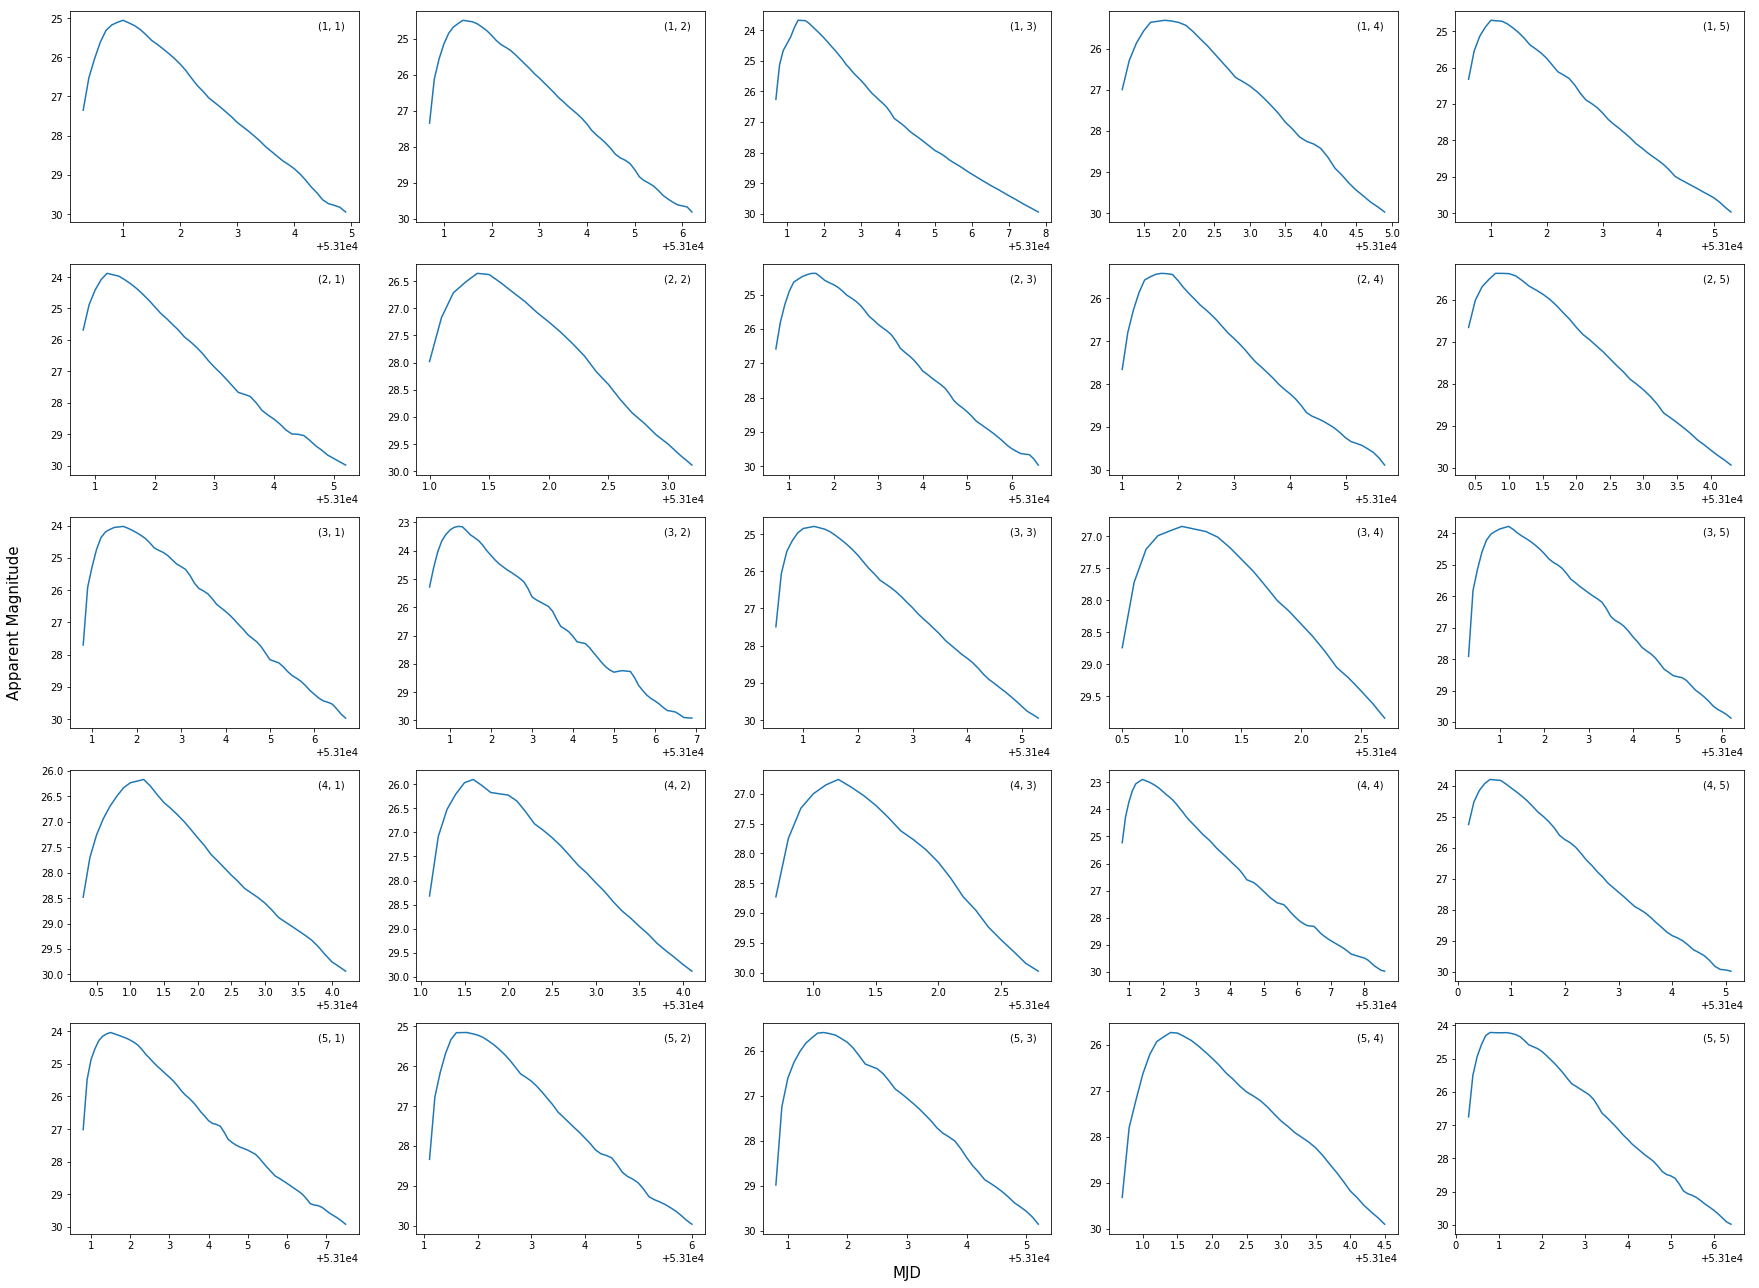

In [129]:
Functions.PlotLightCurve(Path1, 'g', 'KN_B19', FileNo=[18, 14,  2 , 5 , 7], ObjNo = [115,   1, 103, 156,  82], thr=30, sharex=False, Space=True)

The objects plotted are from file No.[8 7 2 5 1], object No.[ 153 1554   53  582 1580]


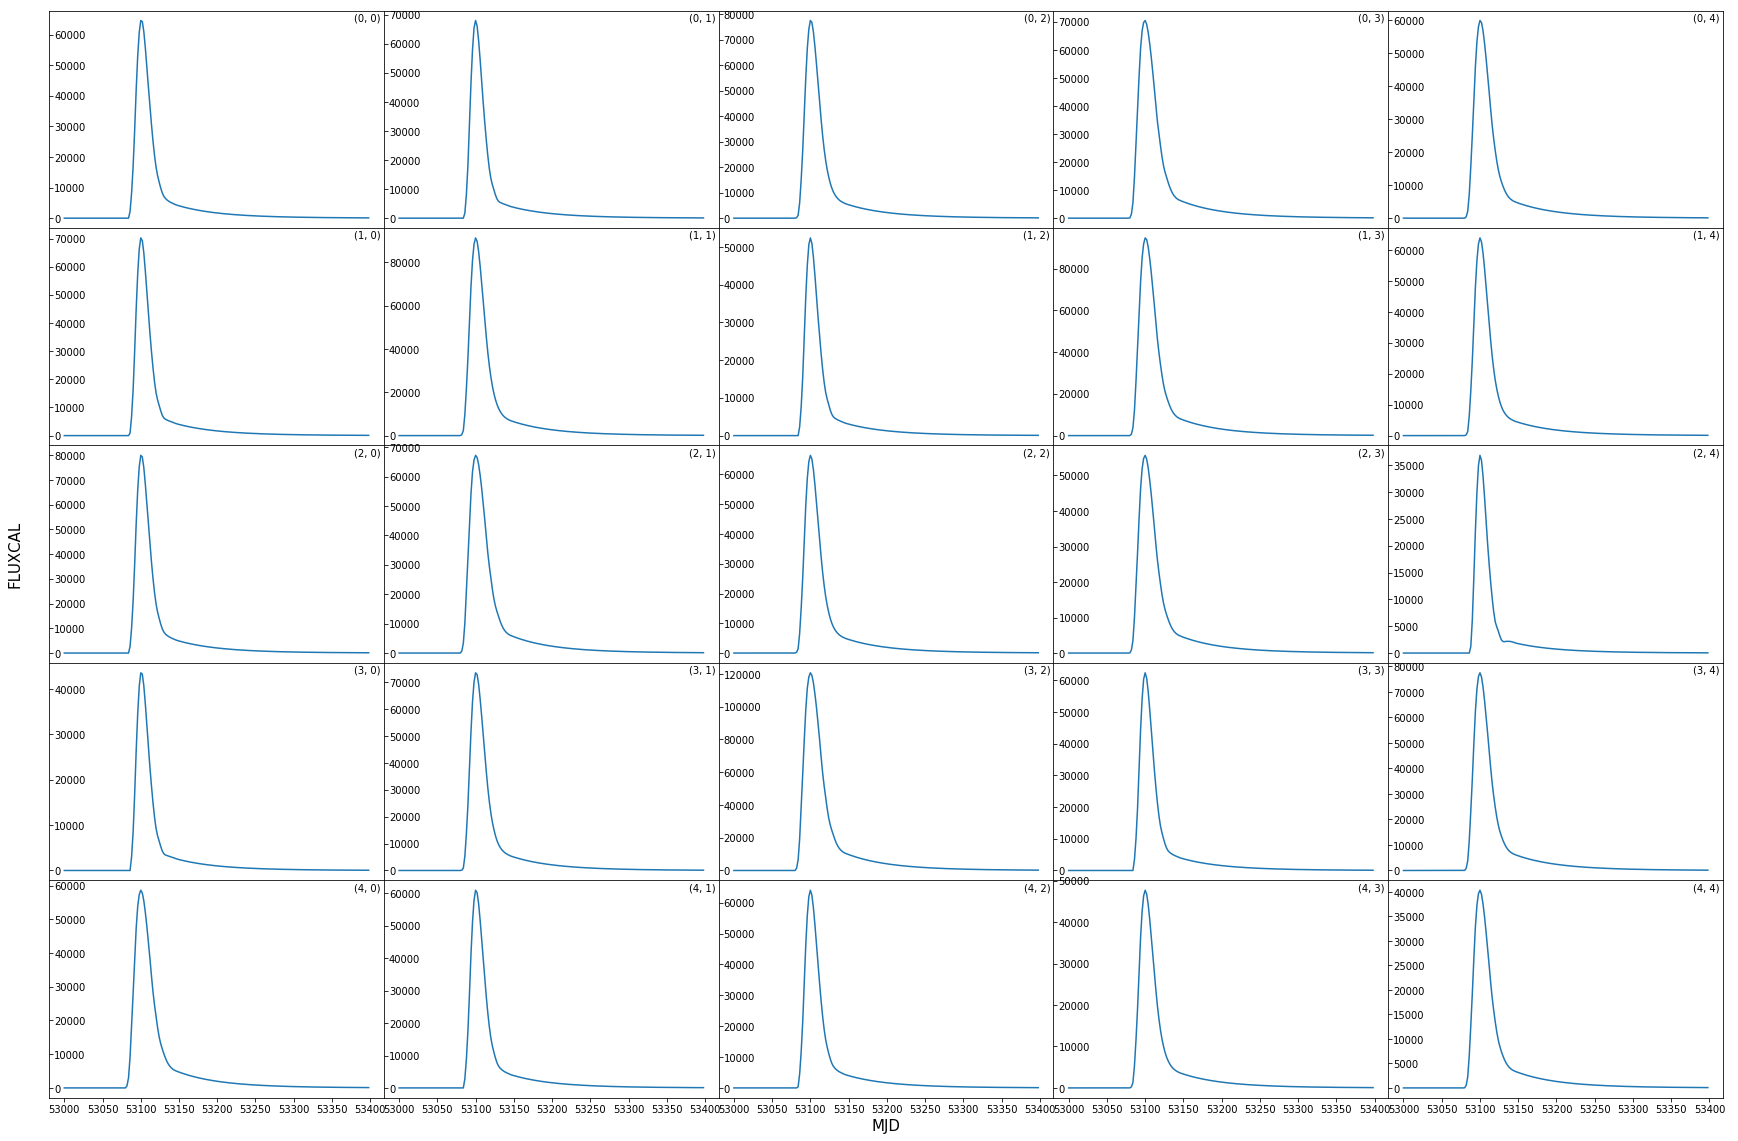

In [86]:
Functions.PlotLightCurve(Path3, 'g', 'SNIa-SALT2', Prop = 'FLUXCAL')

The objects plotted are from FileNo=[12, 6, 15, 9, 2], ObjNo=[26, 184, 1066, 1589, 829]


(array([12,  6, 15,  9,  2]), array([  26,  184, 1066, 1589,  829]))

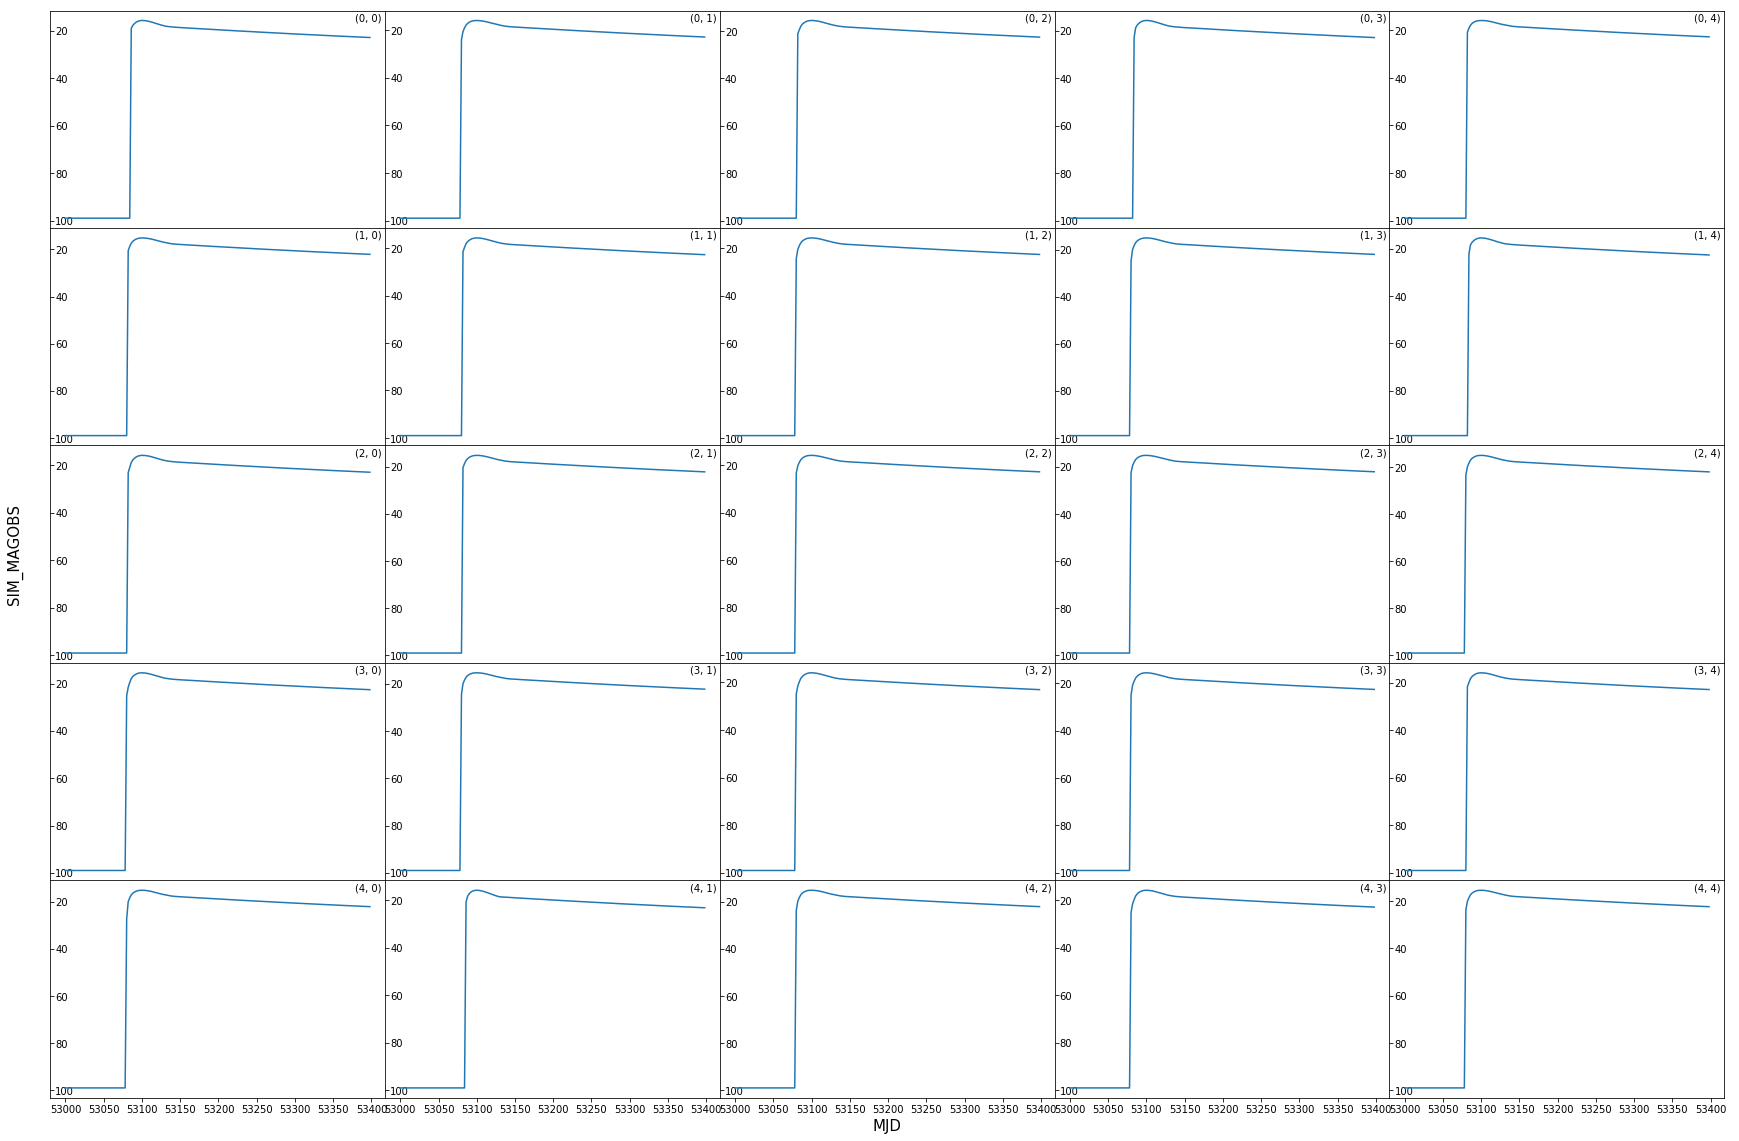

In [112]:
Functions.PlotLightCurve(Path3, 'g', 'SNIa-SALT2')

In [100]:
DataEB = Functions.ReadData(Path3, 'EB', 0 ,0)

In [94]:
np.unique(Data['ZEROPT'])

<Column name='ZEROPT' dtype='float32' length=1>
42.5

In [101]:
pwd

'/global/u2/l/lianming'

In [96]:
DataSN = Functions.ReadData(Path3, 'SNIa-SALT2', 0 ,0)

In [97]:
np.unique(DataSN['ZEROPT'])

<Column name='ZEROPT' dtype='float32' length=1>
42.5

In [98]:
Data

<Table length=1254>
  MJD    BAND  CCDNUM    FIELD     ...   GAIN  SIM_MAGOBS SIM_FLUXCAL_HOSTERR
float64 bytes2 int16    bytes12    ... float32  float32         float32      
------- ------ ------ ------------ ... ------- ---------- -------------------
53000.0     u      -9 NULL         ...     1.0  21.923555                 0.0
53000.0     g      -9 NULL         ...     1.0     18.865                 0.0
53000.0     r      -9 NULL         ...     1.0     18.387                 0.0
53000.0     i      -9 NULL         ...     1.0  18.483555                 0.0
53000.0     z      -9 NULL         ...     1.0     18.817                 0.0
53000.0     Y      -9 NULL         ...     1.0     19.663                 0.0
53002.0     u      -9 NULL         ...     1.0     21.928                 0.0
53002.0     g      -9 NULL         ...     1.0  18.869606                 0.0
53002.0     r      -9 NULL         ...     1.0  18.391605                 0.0
53002.0     i      -9 NULL         ...     1.0  18.487604                 0.0
    ...    ...    ...          ... ...     ...        ...                 ...
53470.0     r      -9 NULL         ...     1.0     18.386                 0.0
53470.0     i      -9 NULL         ...     1.0     18.482                 0.0
53470.0     z      -9 NULL         ...     1.0     18.816                 0.0
53470.0     Y      -9 NULL         ...     1.0     19.662                 0.0
53480.0     u      -9 NULL         ...     1.0  21.939472                 0.0
53480.0     g      -9 NULL         ...     1.0      18.88                 0.0
53480.0     r      -9 NULL         ...     1.0  18.401472                 0.0
53480.0     i      -9 NULL         ...     1.0  18.497473                 0.0
53480.0     z      -9 NULL         ...     1.0  18.830473                 0.0
53480.0     Y      -9 NULL         ...     1.0     19.676                 0.0

In [99]:
DataSN

<Table length=1206>
  MJD    BAND  CCDNUM    FIELD     ...   GAIN  SIM_MAGOBS SIM_FLUXCAL_HOSTERR
float64 bytes2 int16    bytes12    ... float32  float32         float32      
------- ------ ------ ------------ ... ------- ---------- -------------------
53000.0     u      -9 NULL         ...     1.0       99.0                 0.0
53000.0     g      -9 NULL         ...     1.0       99.0                 0.0
53000.0     r      -9 NULL         ...     1.0       99.0                 0.0
53000.0     i      -9 NULL         ...     1.0       99.0                 0.0
53000.0     z      -9 NULL         ...     1.0       99.0                 0.0
53000.0     Y      -9 NULL         ...     1.0       99.0                 0.0
53002.0     u      -9 NULL         ...     1.0       99.0                 0.0
53002.0     g      -9 NULL         ...     1.0       99.0                 0.0
53002.0     r      -9 NULL         ...     1.0       99.0                 0.0
53002.0     i      -9 NULL         ...     1.0       99.0                 0.0
    ...    ...    ...          ... ...     ...        ...                 ...
53398.0     r      -9 NULL         ...     1.0  22.609259                 0.0
53398.0     i      -9 NULL         ...     1.0  22.762573                 0.0
53398.0     z      -9 NULL         ...     1.0   22.18034                 0.0
53398.0     Y      -9 NULL         ...     1.0  21.775417                 0.0
53400.0     u      -9 NULL         ...     1.0  24.323969                 0.0
53400.0     g      -9 NULL         ...     1.0   22.22904                 0.0
53400.0     r      -9 NULL         ...     1.0  22.641743                 0.0
53400.0     i      -9 NULL         ...     1.0  22.792233                 0.0
53400.0     z      -9 NULL         ...     1.0  22.202942                 0.0
53400.0     Y      -9 NULL         ...     1.0  21.793865                 0.0

In [102]:
np.save('DataEB', DataEB[0:30])

In [104]:
Data = np.load('DataEB.npy')

In [105]:
Data

array([(53000., b'u ', -9, b'NULL        ', 4096, -9.,  -0.23403092, nan, 1., 0., 0., 1264.911, 0., 31.622776, 42.5, 0., 1., 21.923555, 0.),
       (53000., b'g ', -9, b'NULL        ', 4096, -9.,  -5.149636  , nan, 1., 0., 0., 1264.911, 0., 31.622776, 42.5, 0., 1., 18.865   , 0.),
       (53000., b'r ', -9, b'NULL        ', 4096, -9.,  -5.155898  , nan, 1., 0., 0., 1264.911, 0., 31.622776, 42.5, 0., 1., 18.387   , 0.),
       (53000., b'i ', -9, b'NULL        ', 4096, -9.,  -5.762577  , nan, 1., 0., 0., 1264.911, 0., 31.622776, 42.5, 0., 1., 18.483555, 0.),
       (53000., b'z ', -9, b'NULL        ', 4096, -9.,  -3.4356177 , nan, 1., 0., 0., 1264.911, 0., 31.622776, 42.5, 0., 1., 18.817   , 0.),
       (53000., b'Y ', -9, b'NULL        ', 4096, -9.,  -2.242602  , nan, 1., 0., 0., 1264.911, 0., 31.622776, 42.5, 0., 1., 19.663   , 0.),
       (53002., b'u ', -9, b'NULL        ', 6144, -9.,  -0.9854978 , nan, 1., 0., 0., 1264.911, 0., 31.622776, 42.5, 0., 1., 21.928   , 0.),
       (53002

In [ ]:
with open('DataEB, 'rb') as f:
    Interp_load = pickle.load(f)
    TimeRange_load = pickle.load(f)   

In [25]:
Functions.GetEventPaths(Path1)

{'AGN': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL88_AGN',
 'CART': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL99_CART',
 'EB': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL16_EB',
 'ILOT': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL99_ILOT',
 'KN_B19': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL64_KN_B19',
 'KN_K17': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL64_KN_K17',
 'MIRA': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL53_MIRA',
 'Mdwarf': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL65_Mdwarf',
 'PISN': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL99_PISN',
 'RRL': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDEAL_zALL_p1day_MODEL92_RRL',
 'SLSN-I': '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day/IDE

In [26]:
Functions.GetEventPaths(Path3)

{'AGN': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL88_AGN',
 'CART': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL99_CART',
 'EB': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL16_EB',
 'ILOT': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL99_ILOT',
 'KN_B19': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL64_KN_B19',
 'KN_K17': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL64_KN_K17',
 'MIRA': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL53_MIRA',
 'Mdwarf': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL65_Mdwarf',
 'PISN': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL99_PISN',
 'RRL': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL92_RRL',
 'SLSN-I': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL95_SLSN-I',
 'SNII-NMF': '/global/homes/l/lianming/data/GSN_IDEAL_z02/IDEAL_z02_MODEL42_SNII-NMF',
 'SNII-Templates': '/global/homes/l/

The threshold for the magnitude is 30.
The objects plotted are from FileNo=[7, 16, 2], ObjNo=[1193, 914, 1191]


(array([ 7, 16,  2]), array([1193,  914, 1191]))

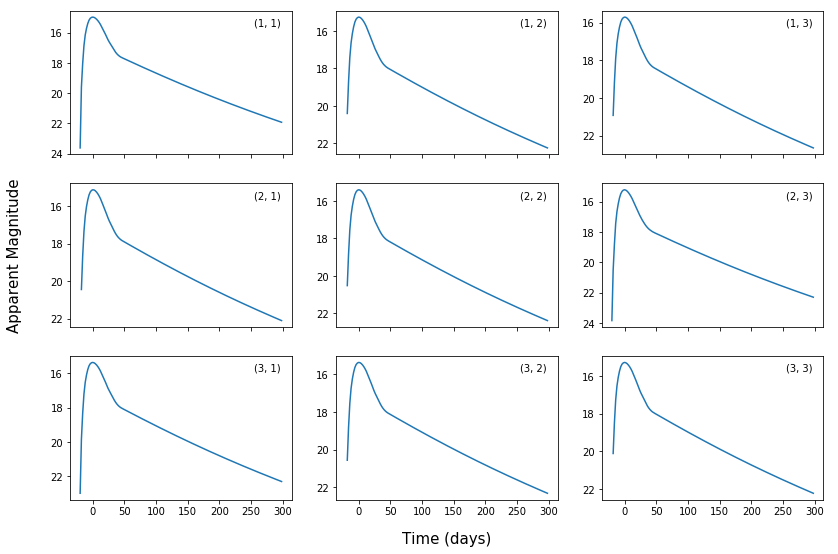

In [184]:
Functions.PlotLightCurve(Path3, 'g', 'SNIa-SALT2', FigNo=9, PlotSizeRatio=0.75, thr=30, Space=True)

The threshold for the magnitude is 30.
The objects plotted are from FileNo=[3, 13, 4], ObjNo=[1956, 992, 302]


(array([ 3, 13,  4]), array([1956,  992,  302]))

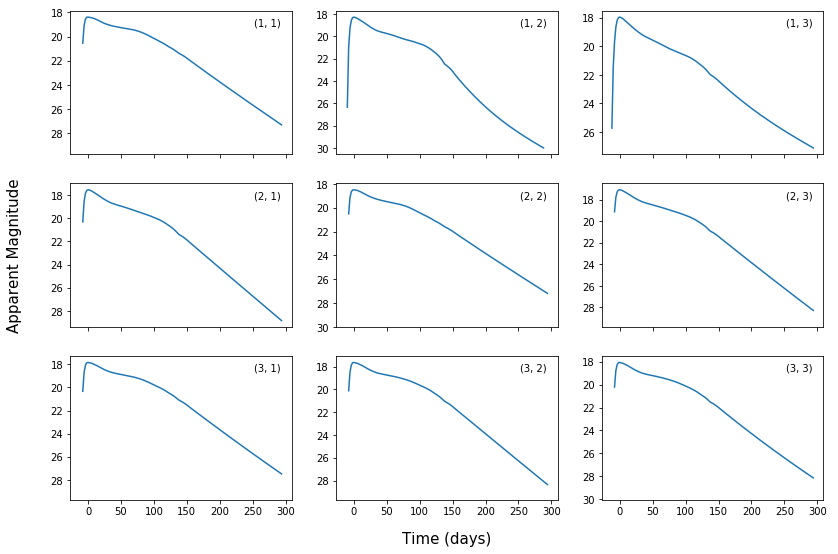

In [185]:
Functions.PlotLightCurve(Path3, 'g', 'SNII-NMF', FigNo=9, PlotSizeRatio=0.75, thr=30, Space=True)

The threshold for the magnitude is 30.
The objects plotted are from FileNo=[15, 10, 10], ObjNo=[1466, 848, 1751]


(array([15, 10, 10]), array([1466,  848, 1751]))

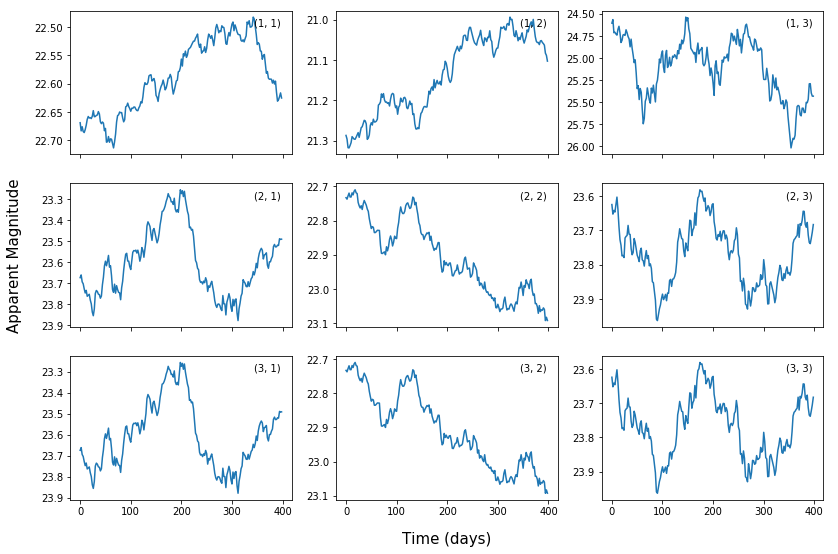

In [186]:
Functions.PlotLightCurve(Path3, 'g', 'AGN', FigNo=9, PlotSizeRatio=0.75, thr=30, Space=True, AlignPeak=False )

The threshold for the magnitude is 30.
The objects plotted are from FileNo=[18, 17, 5], ObjNo=[102, 75, 96]


(array([18, 17,  5]), array([102,  75,  96]))

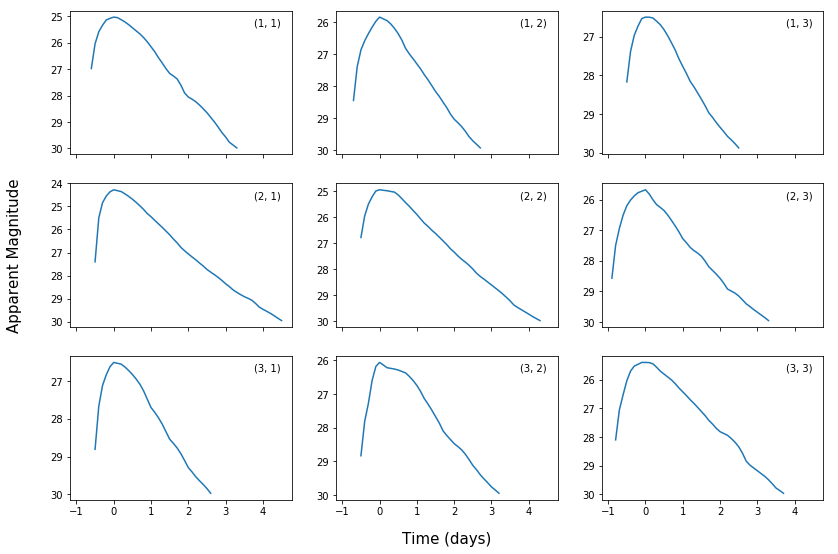

In [191]:
Functions.PlotLightCurve(Path1, 'g', 'KN_B19', FigNo=9, PlotSizeRatio=0.75, thr=30, Space=True)

The threshold for the magnitude is 30.
The objects plotted are from FileNo=[18, 13, 3], ObjNo=[1792, 1985, 1116]


(array([18, 13,  3]), array([1792, 1985, 1116]))

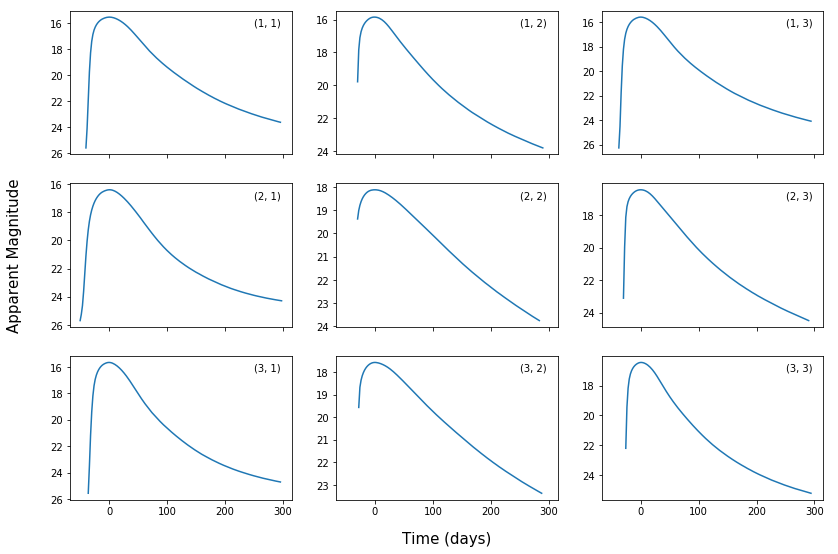

In [192]:
Functions.PlotLightCurve(Path3, 'g', 'TDE', FigNo=9, PlotSizeRatio=0.75, thr=30, Space=True)

The threshold for the magnitude is 30.
The objects plotted are from FileNo=[18, 2, 12], ObjNo=[117, 111, 118]


(array([18,  2, 12]), array([117, 111, 118]))

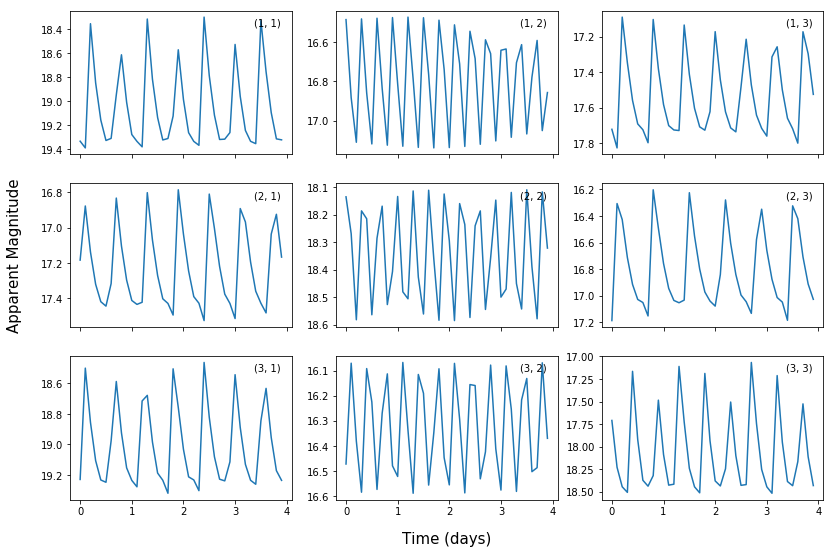

In [197]:
Functions.PlotLightCurve(Path1, 'g', 'RRL', FigNo=9, PlotSizeRatio=0.75, thr=30, Space=True, AlignPeak=False, Range=[0, 40])

The threshold for the magnitude is 30.
The objects plotted are from FileNo=[2, 12, 14], ObjNo=[171, 15, 123]


(array([ 2, 12, 14]), array([171,  15, 123]))

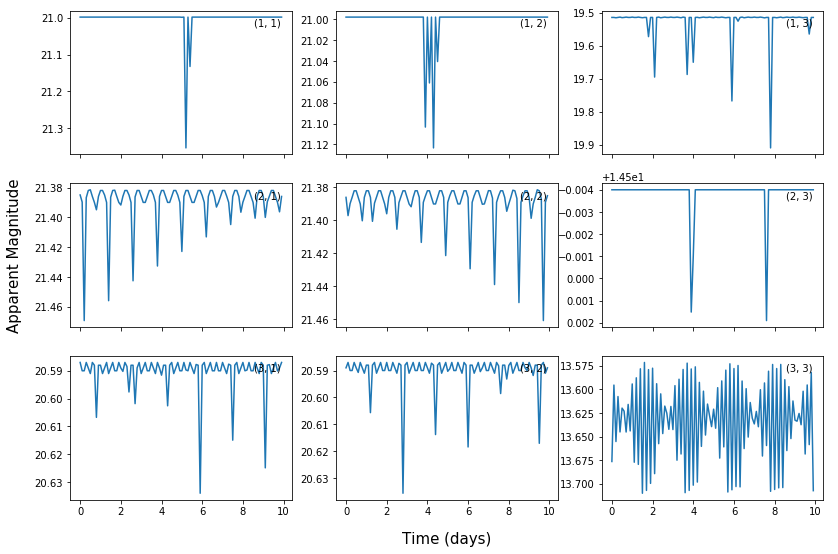

In [204]:
Functions.PlotLightCurve(Path1, 'g', 'EB', FigNo=9, PlotSizeRatio=0.75, thr=30, AlignPeak=False, Space=True, Range=[0, 100])

The threshold for the magnitude is 30.
The objects plotted are from FileNo=[8, 1, 13], ObjNo=[1170, 152, 127]


(array([ 8,  1, 13]), array([1170,  152,  127]))

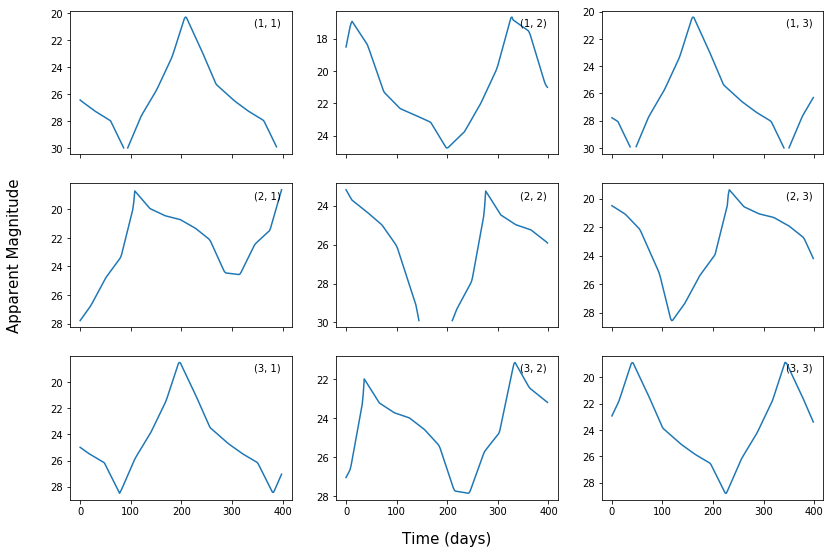

In [208]:
Functions.PlotLightCurve(Path3, 'g', 'MIRA', FigNo=9, PlotSizeRatio=0.75, thr=30, Space=True, AlignPeak=False)

The threshold for the magnitude is 30.
The objects plotted are from FileNo=[13, 11, 15], ObjNo=[627, 1684, 1532]


(array([13, 11, 15]), array([ 627, 1684, 1532]))

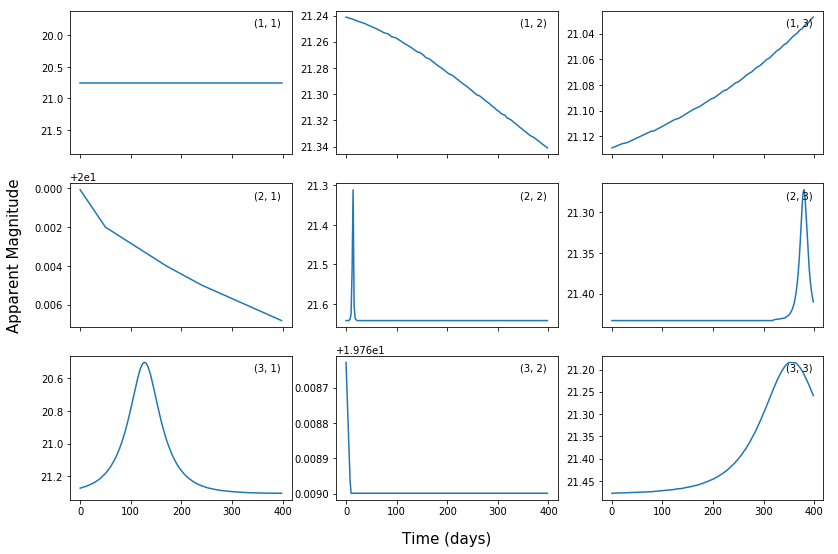

In [210]:
Functions.PlotLightCurve(Path3, 'g', 'uLens-Single-GenLens', FigNo=9, PlotSizeRatio=0.75, thr=30, Space=True, AlignPeak=False)

The threshold for the magnitude is 30.
The objects plotted are from FileNo=[4, 2, 5], ObjNo=[839, 1294, 1643]


(array([4, 2, 5]), array([ 839, 1294, 1643]))

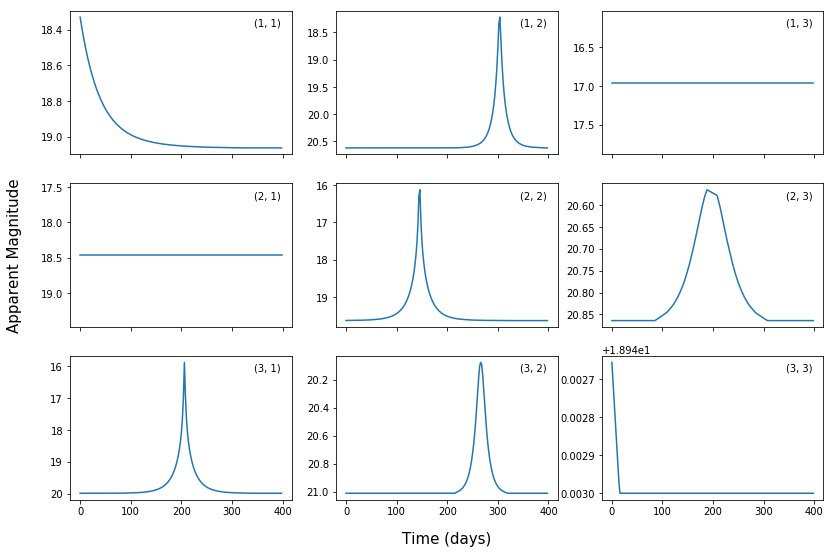

In [211]:
Functions.PlotLightCurve(Path3, 'g', 'uLens-Single_PyLIMA', FigNo=9, PlotSizeRatio=0.75, thr=30, Space=True, AlignPeak=False)

The threshold for the magnitude is 30.
The objects plotted are from FileNo=[12, 13, 6], ObjNo=[233, 661, 1238]


(array([12, 13,  6]), array([ 233,  661, 1238]))

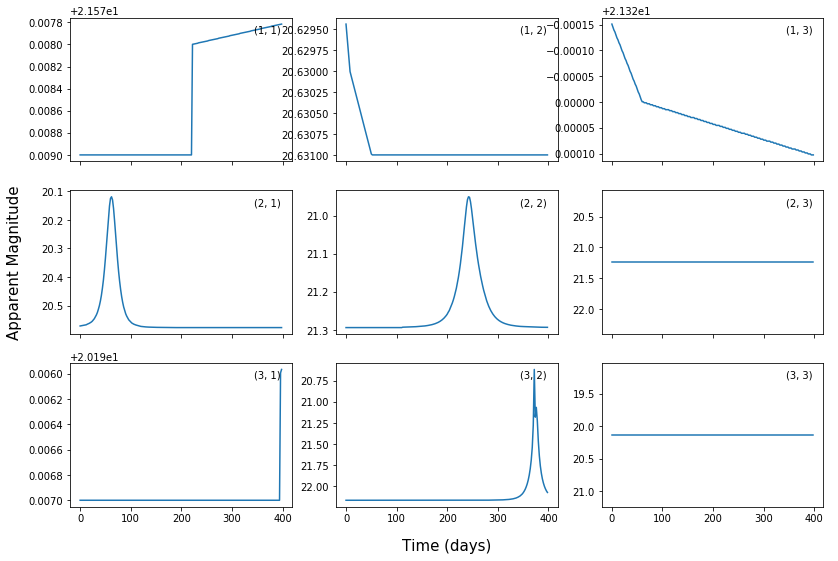

In [214]:
Functions.PlotLightCurve(Path3, 'g', 'uLens-Binary', FigNo=9, PlotSizeRatio=0.75, thr=30, Space=True, AlignPeak=False)

The threshold for the magnitude is 27.5.
The objects plotted are from FileNo=[0, 18, 9, 3, 6], ObjNo=[1770, 500, 1431, 1825, 436]


(array([ 0, 18,  9,  3,  6]), array([1770,  500, 1431, 1825,  436]))

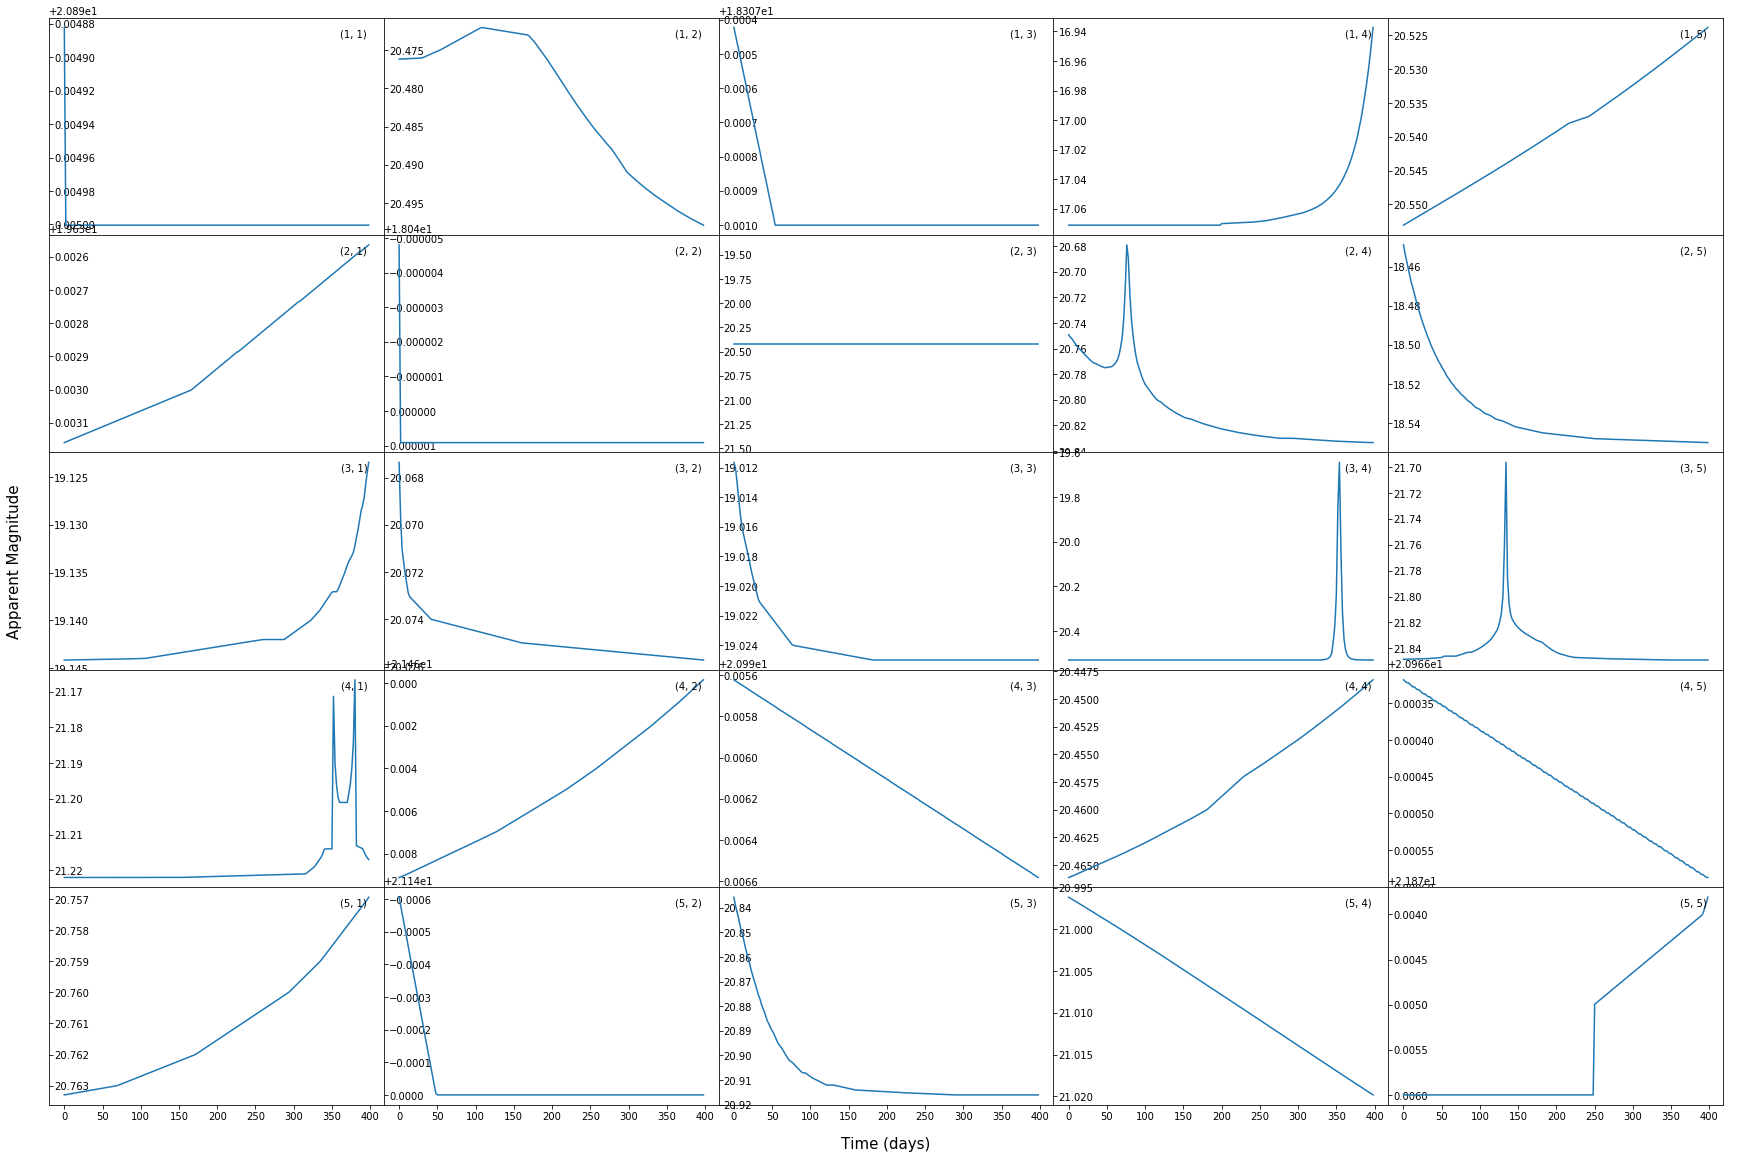

In [13]:
Functions.PlotLightCurve(Path3, 'g', 'uLens-Binary', AlignPeak=False)

The threshold for the magnitude is 27.5.
The objects plotted are from FileNo=[18, 2, 6, 14, 17], ObjNo=[1263, 590, 460, 1590, 1797]


(array([18,  2,  6, 14, 17]), array([1263,  590,  460, 1590, 1797]))

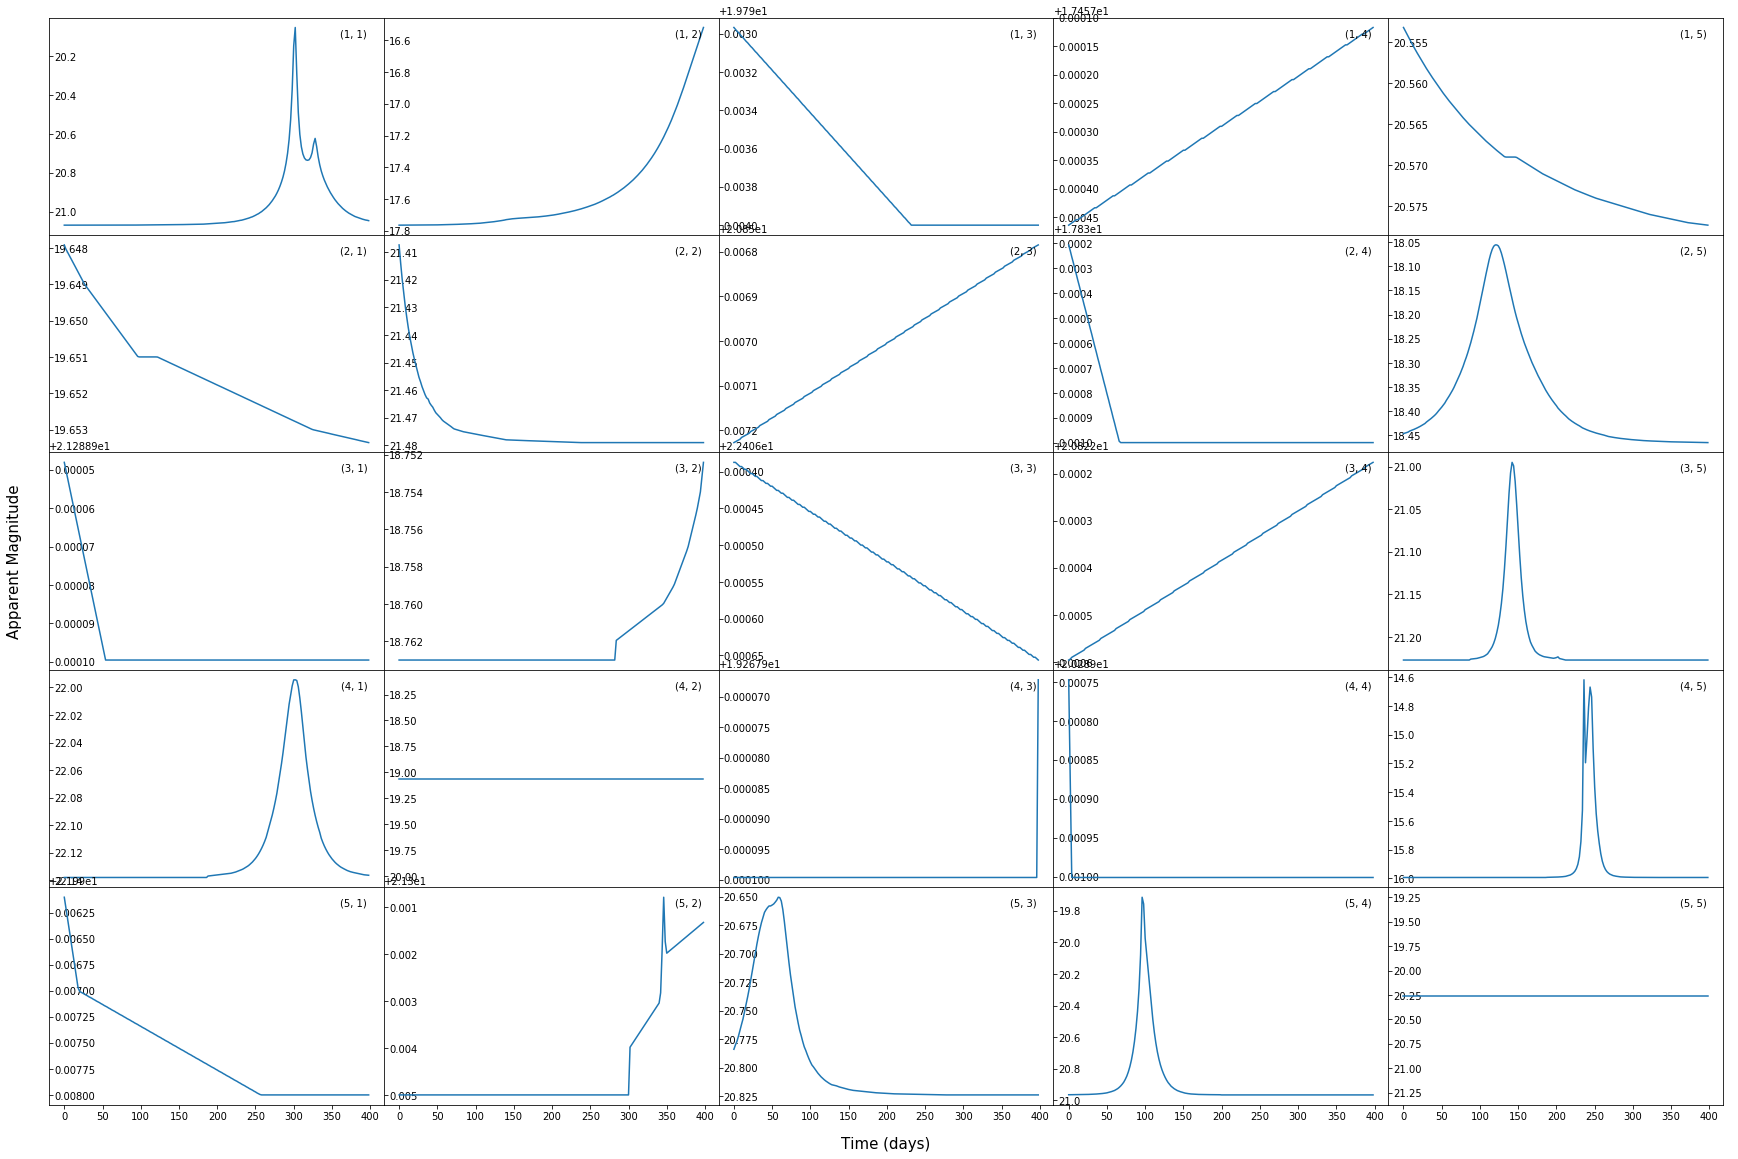

In [12]:
Functions.PlotLightCurve(Path3, 'g', 'uLens-Binary', AlignPeak=False)

The threshold for the magnitude is 27.5.
The objects plotted are from FileNo=[18, 17, 13, 0, 4], ObjNo=[610, 992, 388, 407, 74]


(array([18, 17, 13,  0,  4]), array([610, 992, 388, 407,  74]))

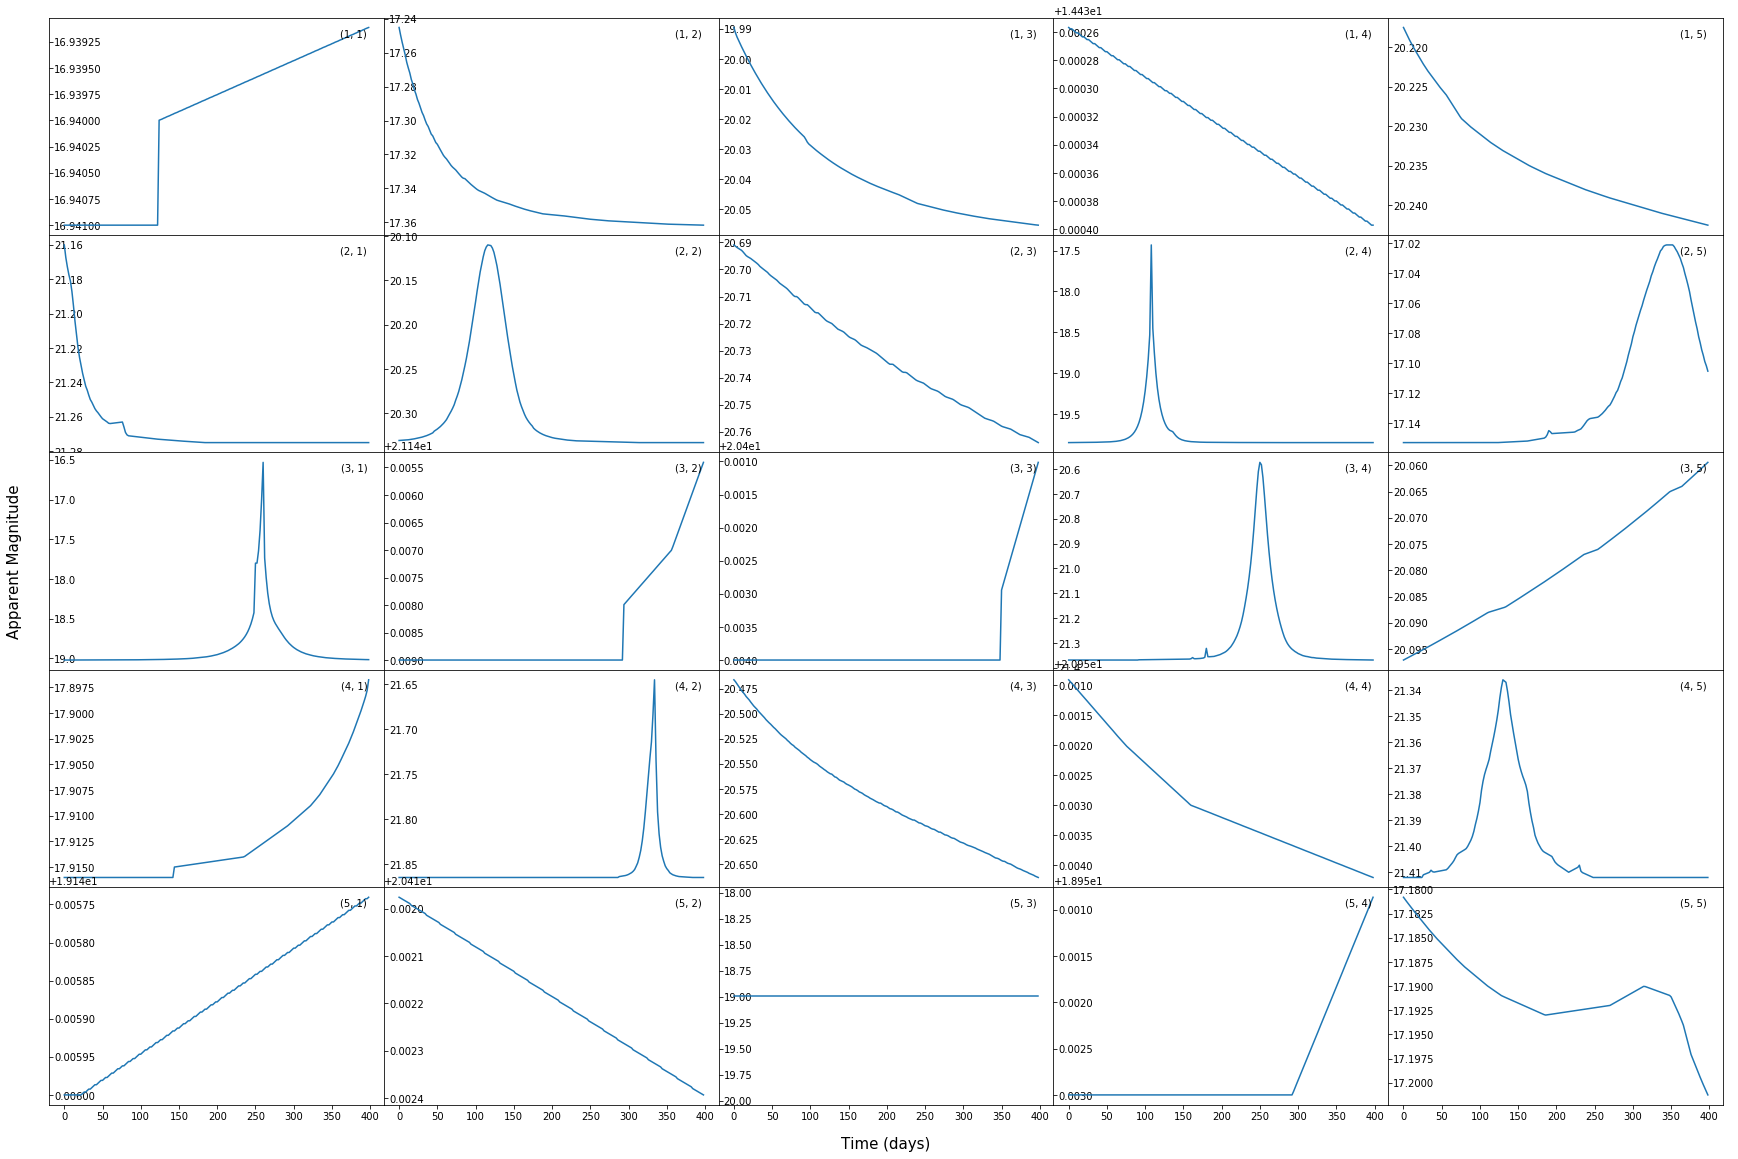

In [11]:
Functions.PlotLightCurve(Path3, 'g', 'uLens-Binary', AlignPeak=False)

The threshold for the magnitude is 27.5.
The objects plotted are from FileNo=[8, 11, 16, 17, 1], ObjNo=[1149, 1174, 1189, 1788, 1927]


([8, 11, 16, 17, 1], [1149, 1174, 1189, 1788, 1927])

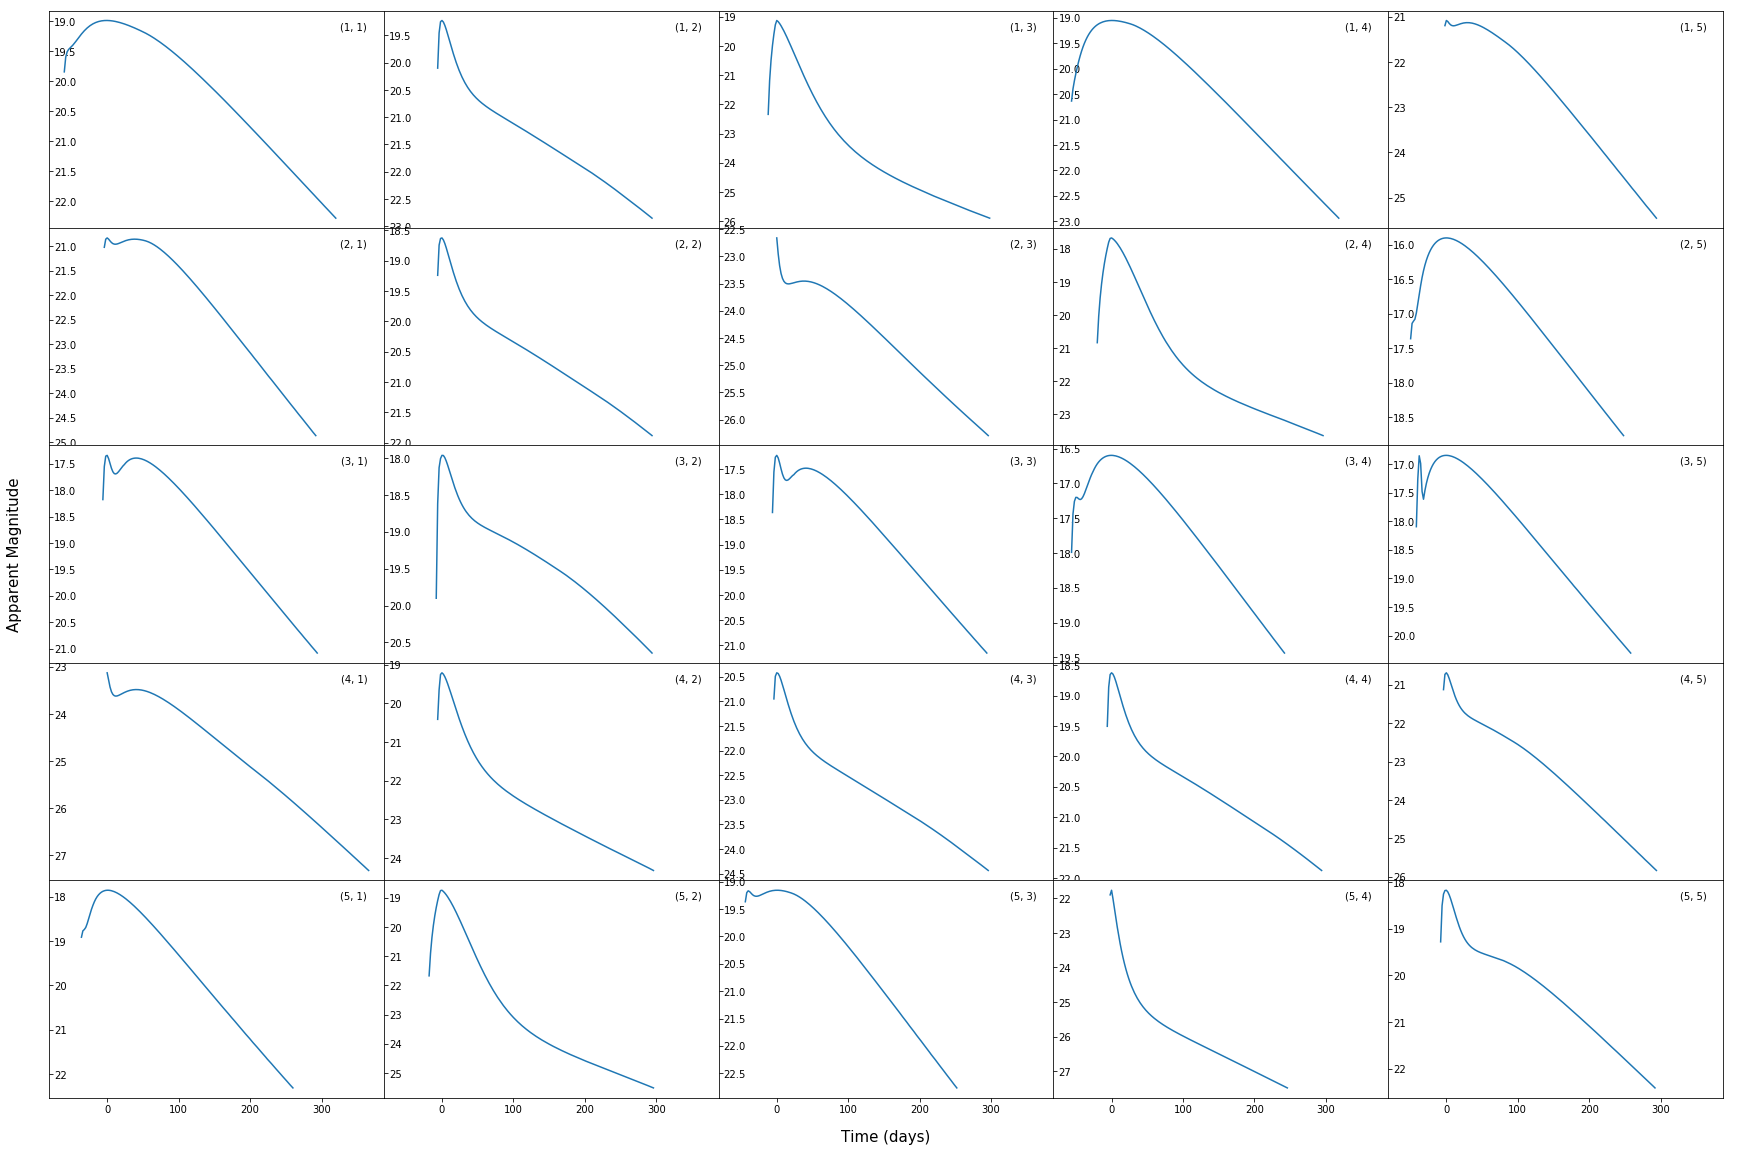

In [9]:
Functions.PlotLightCurve(Path3, 'i', 'SNIIn', FileNo=[8, 11, 16, 17, 1], ObjNo=[1149, 1174, 1189, 1788, 1927])

||||||||||||||||||||

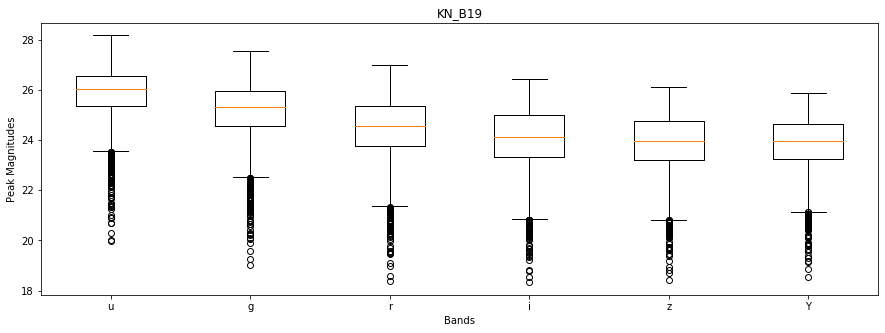

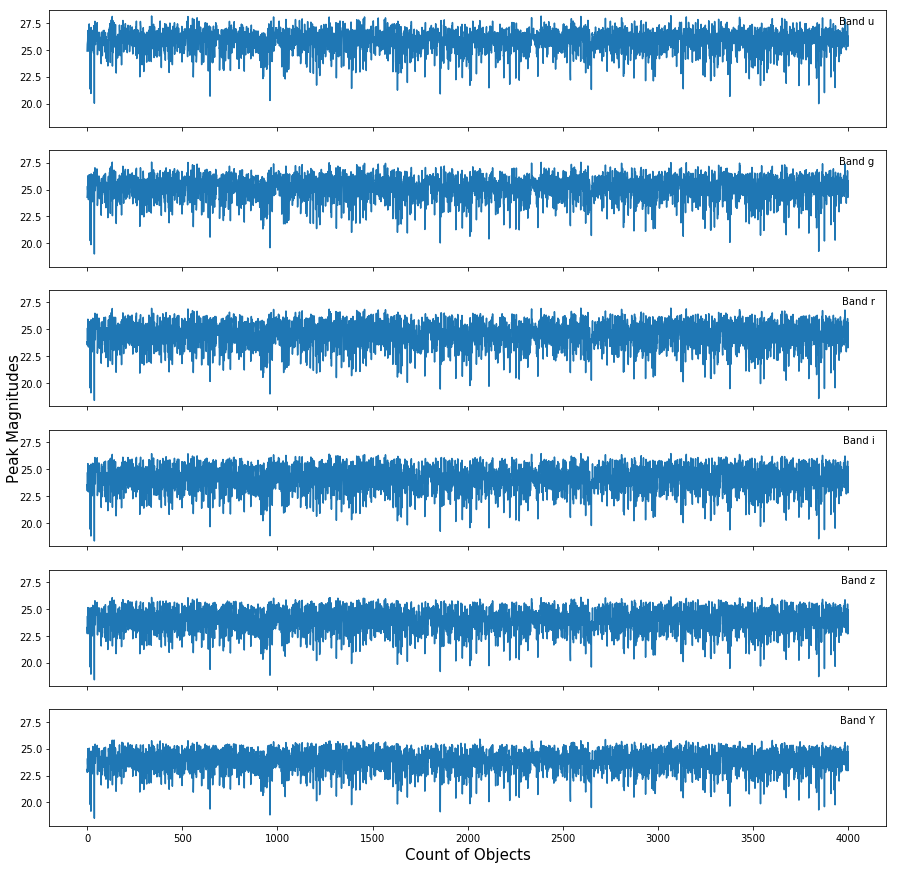

In [43]:
Functions.GetPeakMag(Path1, 'KN_B19')

||||||||||||||||||||

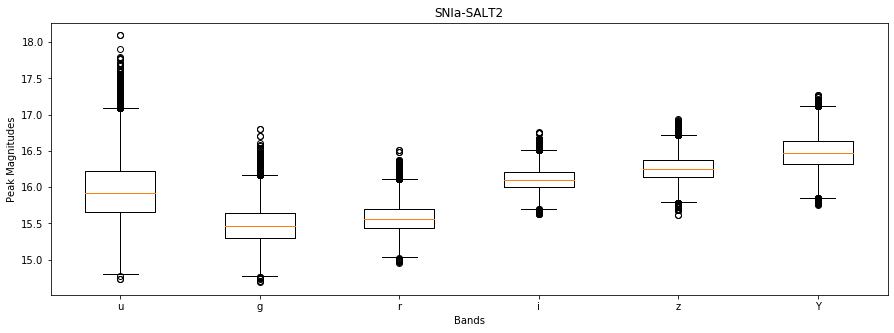

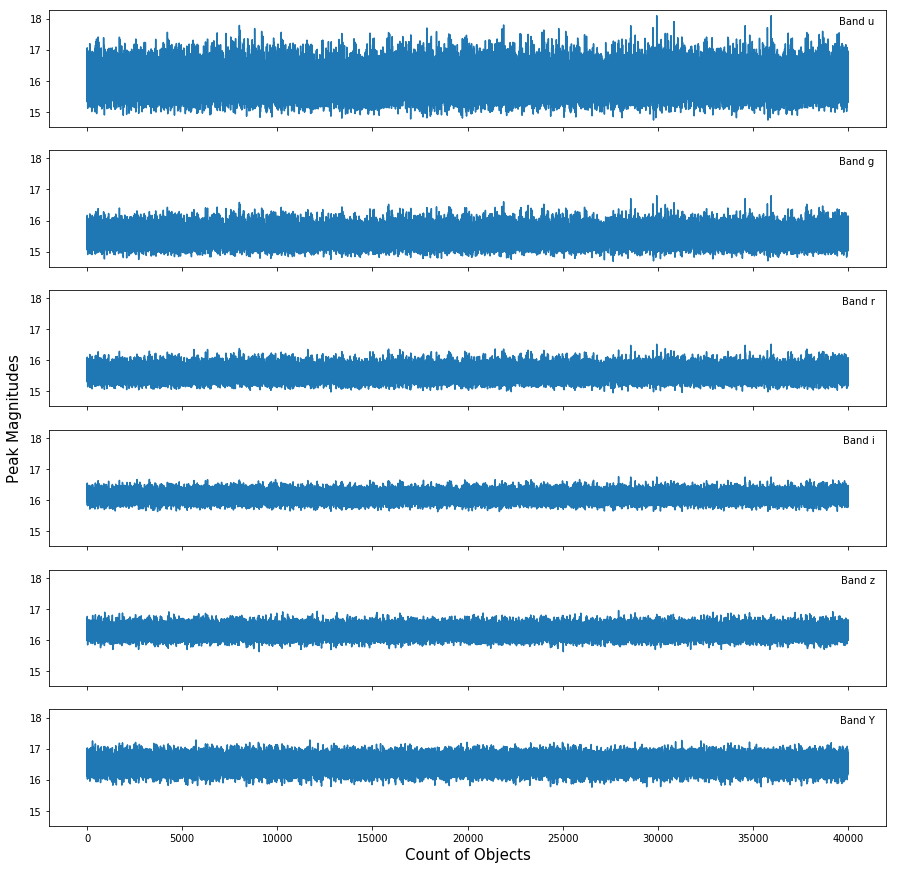

In [44]:
Functions.GetPeakMag(Path3, 'SNIa-SALT2')

||||||||||||||||||||

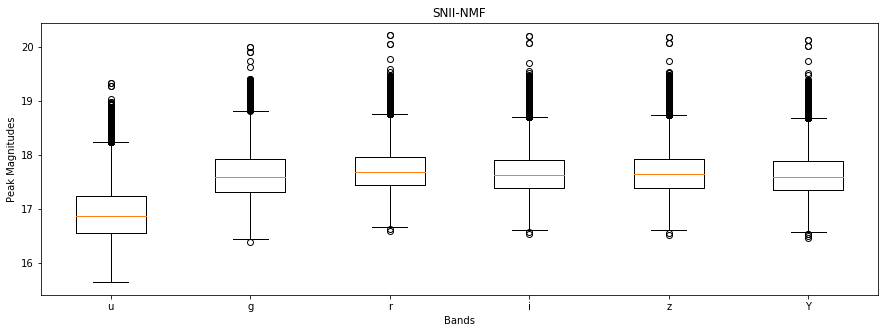

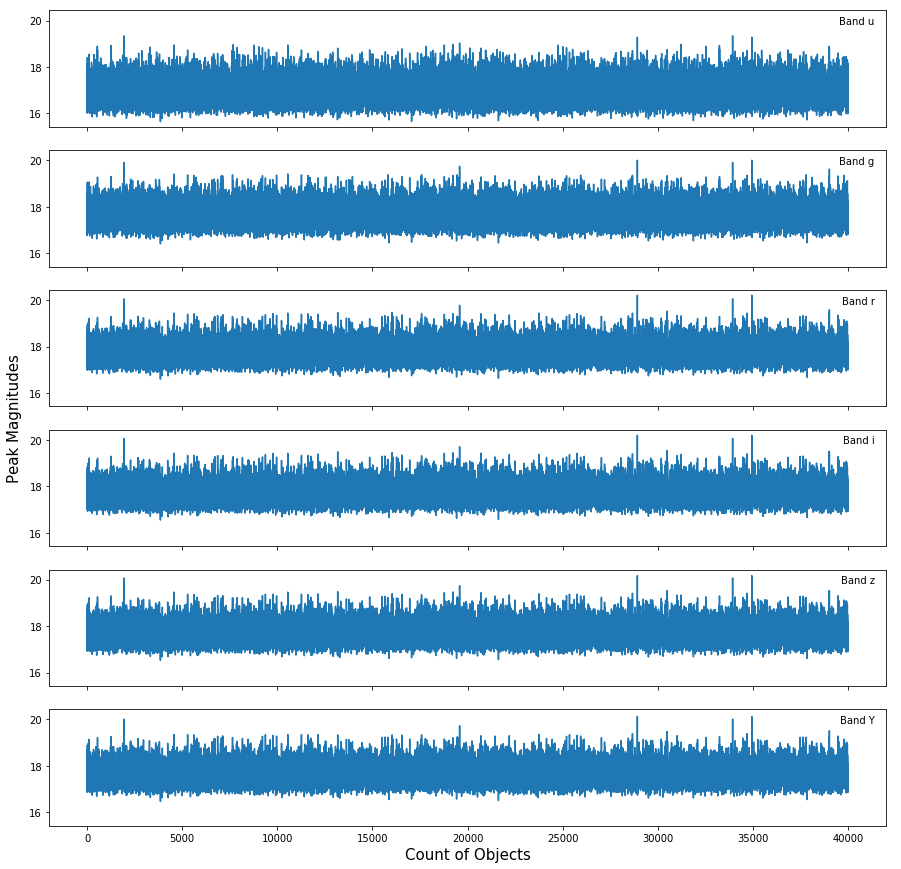

In [45]:
Functions.GetPeakMag(Path3, 'SNII-NMF')

In [68]:
Data = Functions.ReadData(Path3, 'EB', 0,0)

In [69]:
Data

<Table length=1254>
  MJD    BAND  CCDNUM    FIELD     ...   GAIN  SIM_MAGOBS SIM_FLUXCAL_HOSTERR
float64 bytes2 int16    bytes12    ... float32  float32         float32      
------- ------ ------ ------------ ... ------- ---------- -------------------
53000.0     u      -9 NULL         ...     1.0  21.923555                 0.0
53000.0     g      -9 NULL         ...     1.0     18.865                 0.0
53000.0     r      -9 NULL         ...     1.0     18.387                 0.0
53000.0     i      -9 NULL         ...     1.0  18.483555                 0.0
53000.0     z      -9 NULL         ...     1.0     18.817                 0.0
53000.0     Y      -9 NULL         ...     1.0     19.663                 0.0
53002.0     u      -9 NULL         ...     1.0     21.928                 0.0
53002.0     g      -9 NULL         ...     1.0  18.869606                 0.0
53002.0     r      -9 NULL         ...     1.0  18.391605                 0.0
53002.0     i      -9 NULL         ...     1.0  18.487604                 0.0
    ...    ...    ...          ... ...     ...        ...                 ...
53470.0     r      -9 NULL         ...     1.0     18.386                 0.0
53470.0     i      -9 NULL         ...     1.0     18.482                 0.0
53470.0     z      -9 NULL         ...     1.0     18.816                 0.0
53470.0     Y      -9 NULL         ...     1.0     19.662                 0.0
53480.0     u      -9 NULL         ...     1.0  21.939472                 0.0
53480.0     g      -9 NULL         ...     1.0      18.88                 0.0
53480.0     r      -9 NULL         ...     1.0  18.401472                 0.0
53480.0     i      -9 NULL         ...     1.0  18.497473                 0.0
53480.0     z      -9 NULL         ...     1.0  18.830473                 0.0
53480.0     Y      -9 NULL         ...     1.0     19.676                 0.0

In [ ]:
myquota

In [ ]:
aa = np.random.rand(5)